# 5팀_김명환

### 스프린트 미션 #2
#### "어떻게 하면 예약 취소율을 개선할 수 있을지" (예약 취소율을 줄이기 위한 아이디어)
---
- 어떤 조건에서 예약 취소가 빈번하게 발생하는지
- 예약 취소와 관련이 있는 요소들이 무엇인지
---

## 전처리

### 데이터 탐색
- 데이터 크기: 119,390행 × 29열 (약 13.6MB)
- 결측 데이터:
    ```
    - company   112,593
    - agent     16,340
    - country      488
    - children        4
    - canceled        0
    ```
- 특이사항:
    ```
    - lead_time : 최대 737
    - week_nights : 최대 50
    - adults : 최대 55
    - waiting_days : 최대 391
    ```

---

### 데이터 전처리
- `company` 컬럼 삭제: 결측치가 너무 많아 의미 있는 분석이 어려움
- `agent`: 국가별로 가장 많이 사용된 agent를 조회하여 NaN 값 보정 → 남은 결측치: 0
- `country`: agent별 가장 많이 사용된 국가를 조회하여 NaN 값 보정 → 남은 결측치: `'UNK'` Unknown
- `children`: 결측치를 0으로 설정 (입력 실수로 판단됨)
- 중복 데이터 처리:
    - 총 33,103개 레코드 삭제
    - agent 및 country 컬럼 보정 후에도 중복치가 많아 추가 삭제는 하지 않음

---

### 데이터 변환
- 데이터 타입 변환: `int64` → `int32`
- 날짜 관련 컬럼 통합: `arr_*` 항목 → `arr_date`로 통합
- `status_date`: 문자열 → 날짜 데이터로 변환
- 라벨 인코딩 적용: `status`, `reserved_room`, `assigned_room`, `hotel`, `country`, `meal`
- 비용 계산 컬럼 추가: `room_price`
    - 방타입 등급(`room_level`, 0~11)과 시즌에 따라 `base_price` 결정
- 원-핫 인코딩: `dist_channel`, `market_seg`
- 파생 컬럼 추가:
    - `stay_days` = `weekend_nights` + `week_nights`
    - `total_guests` = `adults` + `children` + `babies`
- 한글 및 약어 보조 컬럼 추가

---

### 이상치 처리
- IQR 방식 대신 수동 기준 적용
    - 휴가 기간: 보통 14일 이내이므로 8일 이상은 이상치로 간주하여 삭제
    - 숙박 인원: 일반적으로 최대 8명 기준 적용

---

### 정규화
- Min-Max 스케일링 적용

---

## EDA 요약

### 1. 통계
- [Resort Hotel] 총 예약: 51,512건, 취소: 15,384건, 취소비율: 29.86%
- [City Hotel] 총 예약: 30,080건, 취소: 7,117건, 취소비율: 23.66%

(매출 단위: 만원)

#### [Resort Hotel] 1~12월 월별 예약/취소/취소비율/매출합계/매출비율

| 월   | 예약건수 | 취소건수 | 매출합계 | 취소비율 | 매출비율 |
|:----:|:--------:|:--------:|:--------:|:--------:|:--------:|
| 1월  | 2550     | 680      | 138,848  | 0.27     | 0.04     |
| 2월  | 3434     | 905      | 206,877  | 0.26     | 0.06     |
| 3월  | 4705     | 1322     | 284,357  | 0.28     | 0.08     |
| 4월  | 4974     | 1715     | 329,812  | 0.34     | 0.09     |
| 5월  | 5292     | 1713     | 303,561  | 0.32     | 0.09     |
| 6월  | 4866     | 1474     | 285,097  | 0.30     | 0.08     |
| 7월  | 5490     | 1798     | 566,396  | 0.33     | 0.16     |
| 8월  | 6330     | 2021     | 660,623  | 0.32     | 0.19     |
| 9월  | 4117     | 1030     | 220,156  | 0.25     | 0.06     |
| 10월 | 4069     | 1106     | 231,266  | 0.27     | 0.07     |
| 11월 | 2821     | 701      | 143,399  | 0.25     | 0.04     |
| 12월 | 2864     | 919      | 183,545  | 0.32     | 0.05     |

#### [City Hotel] 1~12월 월별 예약/취소/취소비율/매출합계/매출비율

| 월   | 예약건수 | 취소건수 | 매출합계 | 취소비율 | 매출비율 |
|:----:|:--------:|:--------:|:--------:|:--------:|:--------:|
| 1월  | 1843     | 254      | 86,857   | 0.14     | 0.03     |
| 2월  | 2338     | 409      | 132,341  | 0.17     | 0.05     |
| 3월  | 2424     | 415      | 157,665  | 0.17     | 0.05     |
| 4월  | 2632     | 614      | 208,943  | 0.23     | 0.07     |
| 5월  | 2573     | 628      | 219,999  | 0.24     | 0.08     |
| 6월  | 2242     | 708      | 217,493  | 0.32     | 0.08     |
| 7월  | 3667     | 1127     | 587,293  | 0.31     | 0.20     |
| 8월  | 4039     | 1332     | 653,995  | 0.33     | 0.23     |
| 9월  | 2016     | 507      | 189,049  | 0.25     | 0.07     |
| 10월 | 2476     | 474      | 188,113  | 0.19     | 0.07     |
| 11월 | 1886     | 293      | 108,912  | 0.16     | 0.04     |
| 12월 | 1944     | 356      | 118,599  | 0.18     | 0.04     |

---

### 2. 매출 분포 및 취소 요인
- 취소 상관도를 검토 했을 때 주요 원인 미발견
    - 다만, 시즌시간에 예약, 매출, 취소가 주로 발생 하는 기간입니다.
    - 해당 기간을 선택과 집중으로 포인팅 하겠습니다.
- 숙박 기간별 매출:
    - 리조트: 3~4일 숙박 고객이 전체 매출의 약 50%
    - 시티: 7일 숙박 고객이 전체 매출의 약 36%
- 주요 기간 취소 건 중 어린이 포함 비율:
    - 리조트: 3~4일 숙박 고객의 어린이 포함 비율 18%
    - 시티: 7일 숙박 고객의 어린이 포함 비율 13%
- 7, 8월 매출 비율
    - 리조트: 35%
    - 시티: 43%

---

## 가설 1
- 매출은 시즌(7, 8월)에 집중된다.
- 해당 시기에 매출, 예약, 취소 모두 상승(전반적으로 증가).
- **가설:**  
    - 해당 시기 취소율 증가 중 어린이 포함 비율도 증가(취소 비중 중 23%)
    - 방학 시즌 가족여행 계획 후 미성년자 관련 이슈로 취소 발생 가능성

---

## 개선 방향 검토
- 취소 원인 분석을 위해 **취소 사유 항목 추가** 필요
- 시즌 기간 매출 및 취소율이 동시에 상승하므로 **시즌 취소율 개선 시 매출 증가 기대**
- 인터넷 조사 결과:
    - 미성년자의 경우 신분 증명 관련 서류 미비로 취소되는 사례 존재
    - **예약 시 미성년자 동반 여부 확인 및 관련 서류 안내** 제공 시 취소율 감소 기대

---

## 이상치 데이터 발견 (진행 방향 검토 중)
- 이해할 수 없는 데이터가 있어 검토 중
- 예약일은 상태변경일보다 작거나 같아야 함. 그런데 큰 경우가 있고, 데이터의 25%를 차지
- 해당 데이터는 취소 데이터가 100%로, 취소 분석에 심각한 영향 예상


```
예약일 < 상태변경일: 59,077건 (72.41%)
예약일 > 상태변경일: 20,880건 (25.59%)
예약일 = 상태변경일: 1,635건 (2.00%)

예약일 < 상태변경일: 59,077건, 취소 0건, 취소율 0.00%
예약일 > 상태변경일: 20,880건, 취소 20,880건, 취소율 100.00%
예약일 = 상태변경일: 1,635건, 취소 1,621건, 취소율 99.14%
```

---
# 실행 코드
---

In [145]:
# coalb 에서는 두번 실행 해야 합니다.
# 첫 번째 실행 - 폰트 설치 후 자동 재시작
import importlib.util, sys
from urllib.request import urlretrieve
urlretrieve("https://raw.githubusercontent.com/c0z0c/jupyter_hangul/master/helper_c0z0c_dev.py", "helper_c0z0c_dev.py")
import helper_c0z0c_dev as helper
print("📁 helper 모듈을 로드했습니다.")
helper.setup()

📁 helper 모듈을 로드했습니다.
🚀 Jupyter/Colab 한글 환경 설정을 시작합니다...
fonts-nanum이 이미 설치되어 있습니다.
🔍 Colab 환경에서 폰트 설정 중...
📁 Google Drive 연결 시도 중...
Mounted at /content/drive
✅ Google Drive 연결 성공


**💻 실행 환경**: Colab
✅ 한글 폰트가 성공적으로 설정되었습니다.

✅ pandas 확장 기능이 성공적으로 설정되었습니다.
🎉 모든 설정이 완료되었습니다!
✅ 사용 가능한 기능:
   - 한글 폰트 지원
   - helper.pd_read_csv(): 파일 읽기
   - DataFrame.head_att(): 한글 컬럼 설명


In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [147]:
# df = pd.read_csv('/content/drive/MyDrive/codeit/data/hotel_data_modified.csv')
# df = pd.read_csv('data/hotel_data_modified.csv')

# jupyter, colab 공용
df = helper.pd_read_csv('data/hotel_data_modified.csv')
df_commit_0 = df.copy()

🔍 Colab 환경 - 파일 경로: /content/drive/MyDrive/data/hotel_data_modified.csv
✅ 파일 읽기 성공: /content/drive/MyDrive/data/hotel_data_modified.csv
📊 데이터 크기: 119390행 × 29열 (13,614,934 bytes)


In [148]:
df.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,NaN,NaN,0,0,0,Check-Out,2015-07-01


In [149]:
print(df.columns.to_list())

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [150]:
# 컬럼 한글
korean_columns = {'hotel': '호텔타입', 'is_canceled': '취소여부', 'lead_time': '예약기간', 'arrival_date_year': '도착연도', 'arrival_date_month': '도착월', 'arrival_date_week_number': '도착주', 'arrival_date_day_of_month': '도착일', 'stays_in_weekend_nights': '주말박수', 'stays_in_week_nights': '평일박수', 'adults': '성인수', 'children': '아동수', 'babies': '유아수', 'meal': '식사타입', 'country': '국가', 'market_segment': '시장구분', 'distribution_channel': '유통채널', 'is_repeated_guest': '재방문여부', 'previous_cancellations': '이전취소수', 'previous_bookings_not_canceled': '이전성공수', 'reserved_room_type': '예약룸타입', 'assigned_room_type': '배정룸타입', 'booking_changes': '예약변경수', 'agent': '에이전트ID', 'company': '회사ID', 'days_in_waiting_list': '대기일수', 'required_car_parking_spaces': '주차공간수', 'total_of_special_requests': '특별요청수', 'reservation_status': '예약상태', 'reservation_status_date': '상태변경일'}
df.set_head_att(korean_columns)  # 한글 설명 추가 by 김명환 import helper_c0z0c_dev as helper
df_commit_0_1 = df.copy()

In [151]:
df.head_att(1)

       호텔타입    취소여부  예약기간          도착연도             도착월                   도착주                    도착일                주말박수             평일박수 성인수   아동수 유아수 식사타입    국가       시장구분             유통채널        재방문여부             이전취소수                     이전성공수         예약룸타입         배정룸타입      예약변경수 에이전트ID  회사ID             대기일수                  주차공간수                특별요청수           예약상태              상태변경일
          hotel is_canceled lead_time arrival_date_year arrival_date_month arrival_date_week_number arrival_date_day_of_month stays_in_weekend_nights stays_in_week_nights adults children babies     meal country market_segment distribution_channel is_repeated_guest previous_cancellations previous_bookings_not_canceled reserved_room_type assigned_room_type booking_changes      agent company days_in_waiting_list required_car_parking_spaces total_of_special_requests reservation_status reservation_status_date
 0 Resort Hotel           0       342              2015               July                     

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [153]:
df.describe(include='all').head_att(20)
df.describe(include='all')

          호텔타입            취소여부           예약기간           도착연도             도착월                   도착주                    도착일                주말박수             평일박수             성인수              아동수               유아수 식사타입    국가       시장구분             유통채널          재방문여부             이전취소수                     이전성공수         예약룸타입         배정룸타입          예약변경수         에이전트ID             회사ID             대기일수                  주차공간수                특별요청수           예약상태              상태변경일
             hotel         is_canceled          lead_time  arrival_date_year arrival_date_month arrival_date_week_number arrival_date_day_of_month stays_in_weekend_nights stays_in_week_nights             adults            children               babies     meal country market_segment distribution_channel   is_repeated_guest previous_cancellations previous_bookings_not_canceled reserved_room_type assigned_room_type     booking_changes              agent            company days_in_waiting_list required_car_parking_space

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,NaN,NaN,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,NaN,NaN,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,NaN,NaN,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,86.693382,189.266735,2.321149,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,110.774548,131.655015,17.594721,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,9.000000,62.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,14.000000,179.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,229.000000,270.000000,0.000000,0.000000,1.000000,NaN,NaN


## 중복 및 결측치 처리

In [154]:
print('중복데이터 정리전 결측치 개수 = ', df.isna().sum().sum())

중복데이터 정리전 결측치 개수 =  129425


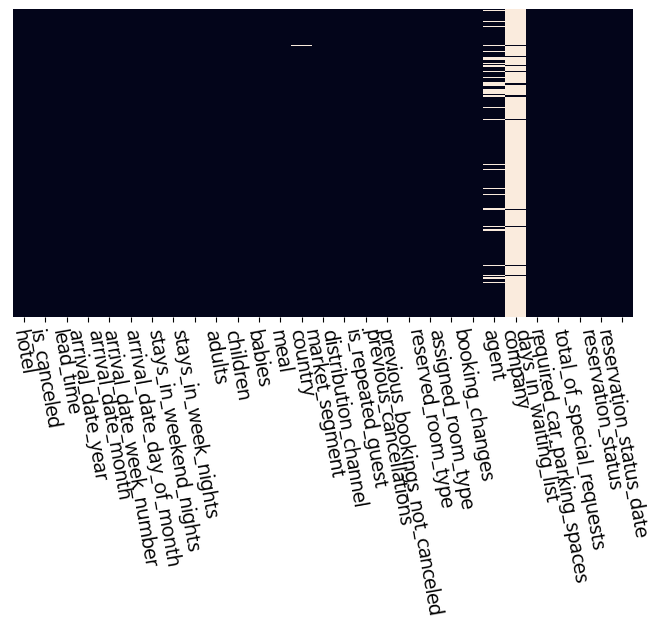

In [107]:
df = df_commit_0_1.copy() # 테스트시 재실행을 위해서
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, annot=False)
plt.tick_params(labelsize=14)
plt.xticks(rotation=-80)
plt.show()

In [108]:
df = df_commit_0_1.copy() # 테스트시 재실행을 위해서

# 중복 컬럼 확인 및 제거
print('삭제전 중복데이터 수 = ', df.duplicated().sum(), '총데이터수=' , df.shape)
df = df.drop_duplicates()
print('삭제후 중복데이터 수 = ', df.duplicated().sum(), '총데이터수=' , df.shape)

df_commit_0_2 = df.copy()

삭제전 중복데이터 수 =  33103 총데이터수= (119390, 29)
삭제후 중복데이터 수 =  0 총데이터수= (86287, 29)


In [109]:
# 결측치 확인
print('중복데이터 정리후 결측치 개수 = ', df.isna().sum().sum())
df.isna().sum().sort_values(ascending=False).head(5)

중복데이터 정리후 결측치 개수 =  93558


,0
company,81115
agent,11988
country,451
children,4
is_canceled,0


In [110]:

df = df_commit_0_2.copy()  # 테스트시 재실행을 위해서
# 결측치 삭제 및 보완

print('1 삭제전 쳘측치 수 = ', df.isna().sum().sum(), '총데이터수=' , df.shape)
# 결측치가 있는 컬럼 삭제
df = df.drop(columns=['company'])

# 성인수가 0 이면 삭제
df = df[df['adults'] > 0].copy()
after = df.shape[0]


print('1 삭제전 쳘측치 수 = ', df.isna().sum().sum(), '총데이터수=' , df.shape)

df_commit_0_3 = df.copy()  # 테스트시 재실행을 위해서

1 삭제전 쳘측치 수 =  93558 총데이터수= (86287, 29)
1 삭제전 쳘측치 수 =  12369 총데이터수= (85904, 28)


In [111]:
df = df_commit_0_3.copy()  # 테스트시 재실행을 위해서

print("\n0 결측치 보완 개수:\n", df.isna().sum().sort_values(ascending=False).head(4))

# agent별로 가장 많이 활동한 country 찾기 (country가 nan이 아닌 경우만)
agent_country_max = df[df['country'].notna()].groupby('agent')['country'].agg(lambda x: x.value_counts().idxmax())
#agent_country_max

#mask_country_na = df['country'].isna()
mask_country_na = df['country'].isna()
#mask_country_na
print("mask_country_na", mask_country_na.sum())

df.loc[mask_country_na, 'country'] = df[mask_country_na]['agent'].map(agent_country_max)
# df.loc[mask_country_na, 'country']

print("\n1 결측치 보완 개수:\n", df.isna().sum().sort_values(ascending=False).head(4))

# 남은 결측치는 'UNK'로 처리
df['country'] = df['country'].fillna('UNK')

print("\n2 결측치 보완 개수:\n", df.isna().sum().sort_values(ascending=False).head(4))

# country별로 가장 많이 사용된 agent 찾기 (agent가 nan이 아닌 경우만)
ountry_agent_max = df[df['agent'].notna()].groupby('country')['agent'].agg(lambda x: x.value_counts().idxmax())
mask_agent_na = df['agent'].isna()
print("mask_country_na", mask_agent_na.sum())
df.loc[mask_agent_na, 'agent'] = df[mask_agent_na]['country'].map(ountry_agent_max)

print("\n3 결측치 보완 개수:\n", df.isna().sum().sort_values(ascending=False).head(4))
# 남은 결측치는 '0'로 처리
df['agent'] = df['agent'].fillna(0)

print("\n4 결측치 보완 개수:\n", df.isna().sum().sort_values(ascending=False).head(4))

# 아마도 아동수는 미입력
df['children'] = df['children'].fillna(0)

print("\n5 결측치 보완 개수:\n", df.isna().sum().sort_values(ascending=False).head(4))

df_commit_0_4 = df.copy()  # 테스트시 재실행을 위해서



0 결측치 보완 개수:
 agent       11919
country       446
children        4
hotel           0
dtype: int64
mask_country_na 446

1 결측치 보완 개수:
 agent       11919
country       321
children        4
hotel           0
dtype: int64

2 결측치 보완 개수:
 agent        11919
children         4
lead_time        0
hotel            0
dtype: int64
mask_country_na 11919

3 결측치 보완 개수:
 children     4
agent        4
lead_time    0
hotel        0
dtype: int64

4 결측치 보완 개수:
 children       4
hotel          0
lead_time      0
is_canceled    0
dtype: int64

5 결측치 보완 개수:
 hotel                0
is_canceled          0
lead_time            0
arrival_date_year    0
dtype: int64


중복 데이터 개수 =  2038 총데이터수 =  (85904, 28)


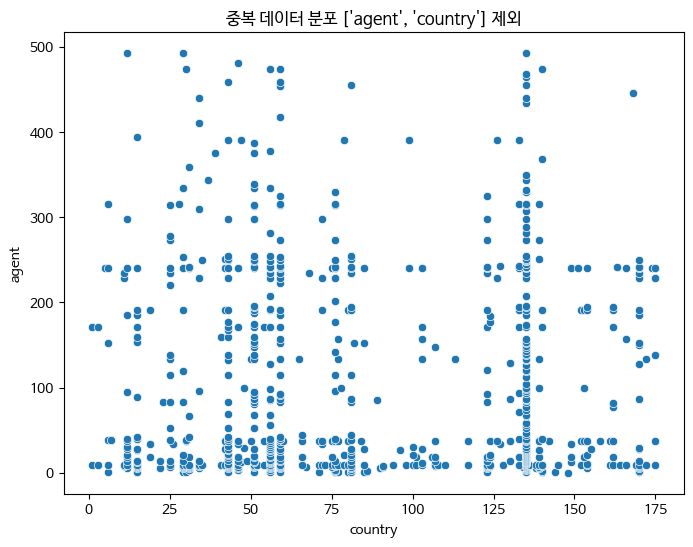

            agent   country     count
agent    1.000000 -0.003707 -0.100263
country -0.003707  1.000000  0.021888
count   -0.100263  0.021888  1.000000
상관 계수 비교 결과:
agent와 country의 상관계수: -0.004 (거의 없음)
agent와 count의 상관계수: -0.100 (약한 상관)
country와 count의 상관계수: 0.022 (거의 없음)


In [112]:
# 보정한 agent나 country를 제외한 중복 데이터
df = df_commit_0_4.copy()  # 테스트시 재실행을 위해서

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# df['country_num'] = le.fit_transform(df['country'])
# 풀필요하게 컬럼을 느리지 말고 덮어 쓰자
df['country'] = le.fit_transform(df['country'])

#df.head_att()

# ['agent', 'country'] 를 제외한 중복 데이터 확인
mask_df = df.duplicated(subset=[c for c in df.columns if c not in ['agent', 'country']])
print("중복 데이터 개수 = ", mask_df.sum(), "총데이터수 = ", df.shape)

# 중복 데이터 분포를 살펴 보고 삭제 여부를 결정하자
# 뭉쳐 있다면 agetnt나 country 와 상관 없이 동일한 경우가 많을 것이다.
# 흩어져 있다면 agetnt나 country 와 상관 없이 동일한 경우가 적을 것이다.

df_dd = df[mask_df][['agent', 'country']].groupby(['agent', 'country']).size().reset_index(name='count')
plt.figure(figsize=(8, 6))
plt.title("중복 데이터 분포 ['agent', 'country'] 제외")
sns.scatterplot(data=df_dd, x='country', y='agent')
plt.show()

corr = df_dd.corr()
print(df_dd.corr())
# 상관계수 해석 기준
def corr_strength(val):
    val = abs(val)
    if val < 0.1:
        return "거의 없음"
    elif val < 0.3:
        return "약한 상관"
    elif val < 0.7:
        return "중간 상관"
    else:
        return "강한 상관"

print("상관 계수 비교 결과:")
print(f"agent와 country의 상관계수: {corr.loc['agent', 'country']:.3f} ({corr_strength(corr.loc['agent', 'country'])})")
print(f"agent와 count의 상관계수: {corr.loc['agent', 'count']:.3f} ({corr_strength(corr.loc['agent', 'count'])})")
print(f"country와 count의 상관계수: {corr.loc['country', 'count']:.3f} ({corr_strength(corr.loc['country', 'count'])})")

# 상관계수가 약한 경우는 중복 데이터가 많이 않다 즉 중복 ['agent', 'country']를 제외한 중복 데이터는 삭제하면 안된다.


## 데이터 타입 변환 및 라벨인코딩

In [113]:
#df.describe(include='all').head_att(3)
df.head_att(3)

       호텔타입    취소여부  예약기간          도착연도             도착월                   도착주                    도착일                주말박수             평일박수 성인수   아동수 유아수 식사타입    국가       시장구분             유통채널        재방문여부             이전취소수                     이전성공수         예약룸타입         배정룸타입      예약변경수 에이전트ID             대기일수                  주차공간수                특별요청수           예약상태              상태변경일
          hotel is_canceled lead_time arrival_date_year arrival_date_month arrival_date_week_number arrival_date_day_of_month stays_in_weekend_nights stays_in_week_nights adults children babies     meal country market_segment distribution_channel is_repeated_guest previous_cancellations previous_bookings_not_canceled reserved_room_type assigned_room_type booking_changes      agent days_in_waiting_list required_car_parking_spaces total_of_special_requests reservation_status reservation_status_date
 0 Resort Hotel           0       342              2015               July                       27          

In [114]:
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [115]:
from sklearn.preprocessing import LabelEncoder

df = df_commit_0_4.copy()
# print(df.info())
# df.describe(include='all').head_att(20)

# int64 컬럼을 int32로 변경
for col in df.select_dtypes(include='int64').columns:
    df[col] = df[col].astype('int32')

df['children'] = df['children'].astype('int32')
df['agent'] = df['agent'].astype('int32')

df['arr_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + ' ' + df['arrival_date_month'] + ' ' + df['arrival_date_day_of_month'].astype(str)).dt.date
df.set_head_att('arr_date','도착일')
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date']).dt.date

# # 날짜 관련 컬럼 삭제
# df = df.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_week_number'])
# df.remove_head_att('arrival_date_year')
# df.remove_head_att('arrival_date_month')
# df.remove_head_att('arrival_date_day_of_month')
# df.remove_head_att('arrival_date_week_number')
df['arr_year_month'] = df['arr_date'].apply(lambda x: f"{x.year}-{x.month:02d}")
df.set_head_att('arr_year_month','도착기간월')

df['stay_days'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.set_head_att('stay_days','숙박일')

df['total_guests'] = df['adults'] + df['children'] + df['babies']
df.set_head_att('total_guests','숙박인원')

# 라벨 인코딩이 적합한 컬럼(범주형, 문자열)
label_cols = [
    'hotel',                # 호텔명 (Resort Hotel, City Hotel)
    'meal',                 # 식사 유형
    'country',              # 국가 코드
    'market_segment',       # 시장 세그먼트
    'distribution_channel', # 예약 유통 채널
    'reserved_room_type',   # 예약한 룸 타입
    'assigned_room_type',   # 배정된 룸 타입
    'reservation_status',   # 예약 상태
]

for col in label_cols:
    if df[col].dtype == 'object' or str(df[col].dtype).startswith('category'):
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        print(f"{col} 라벨 인코딩 매핑: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("라벨 인코딩 완료:", label_cols)


# 1. 요금 테이블
room_base_price = {
    (0, 'low'): 80000,    # A
    (0, 'high'): 120000,
    (1, 'low'): 90000,    # B
    (1, 'high'): 140000,
    (2, 'low'): 100000,   # C
    (2, 'high'): 150000,
    (3, 'low'): 110000,   # D
    (3, 'high'): 160000,
    (4, 'low'): 120000,   # E
    (4, 'high'): 170000,
    (5, 'low'): 130000,   # F
    (5, 'high'): 180000,
    (6, 'low'): 140000,   # G
    (6, 'high'): 190000,
    (7, 'low'): 150000,   # H
    (7, 'high'): 200000,
    (8, 'low'): 160000,   # I
    (8, 'high'): 210000,
    (9, 'low'): 170000,   # K
    (9, 'high'): 220000,
    (10, 'low'): 180000,  # L
    (10, 'high'): 230000,
    (11, 'low'): 190000,  # P
    (11, 'high'): 240000,
}

# 2. 시즌 구분 함수 (성수기: 7,8월, 그 외 비수기)
def get_season(arr_date):
    if hasattr(arr_date, 'month'):
        month = arr_date.month
    else:
        month = int(str(arr_date)[5:7])
    return 'high' if month in [7, 8] else 'low'

# 3. 요금 계산 함수
def calc_room_price(row):
    season = get_season(row['arr_date'])
    # reserved_room_type이 라벨 인코딩된 경우, room_level로 사용
    room_level = row['reserved_room_type']
    base_price = room_base_price.get((room_level, season), 0)
    adults_price = base_price * row['adults']
    children_price = base_price * 0.7 * row['children']
    babies_price = 0  # 유아 무료
    # 식사 옵션 추가요금 (라벨 인코딩된 meal 값에 따라 처리)
    meal_price = 0
    # meal 라벨 인코딩 매핑 참고: {'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4}
    if row['meal'] == 0:  # BB
        meal_price = 10000 * (row['adults'] + row['children'])
    elif row['meal'] == 2:  # HB
        meal_price = 20000 * (row['adults'] + row['children'])
    # 주말/평일 (주말 20% 할증)
    weekend_price = (adults_price + children_price) * 1.2 * row['stays_in_weekend_nights']
    weekday_price = (adults_price + children_price) * row['stays_in_week_nights']
    total_price = weekend_price + weekday_price + babies_price + meal_price
    return round(total_price / 10000)  # 1만원 단위 정수형으로 반환

# 4. 요금 컬럼 생성
df['room_price'] = df.apply(calc_room_price, axis=1).astype('int64')
df.set_head_att('room_price','요금')

# def guest_type(row):
#     if row['children'] > 0 and row['babies'] > 0:
#         return 'family_mixed'
#     elif row['children'] > 0:
#         return 'family_children'
#     elif row['babies'] > 0:
#         return 'family_babies'
#     else:
#         return 'adults_only'

def guest_type(row):
    if row['children'] > 0 and row['babies'] > 0:
        return 3
    elif row['children'] > 0:
        return 2
    elif row['babies'] > 0:
        return 1
    else:
        return 0

df['guest_type'] = df.apply(guest_type, axis=1).astype('int32')
df.set_head_att('guest_type','가족분류')
print(f"guest_type: 0:성인 1:유아 2:아동 3:혼합(유아+아동)")

df_commit_0_5 = df.copy()  # 테스트시 재실행을 위해서


hotel 라벨 인코딩 매핑: {'City Hotel': np.int64(0), 'Resort Hotel': np.int64(1)}
meal 라벨 인코딩 매핑: {'BB': np.int64(0), 'FB': np.int64(1), 'HB': np.int64(2), 'SC': np.int64(3), 'Undefined': np.int64(4)}
country 라벨 인코딩 매핑: {'ABW': np.int64(0), 'AGO': np.int64(1), 'AIA': np.int64(2), 'ALB': np.int64(3), 'AND': np.int64(4), 'ARE': np.int64(5), 'ARG': np.int64(6), 'ARM': np.int64(7), 'ASM': np.int64(8), 'ATA': np.int64(9), 'ATF': np.int64(10), 'AUS': np.int64(11), 'AUT': np.int64(12), 'AZE': np.int64(13), 'BDI': np.int64(14), 'BEL': np.int64(15), 'BEN': np.int64(16), 'BFA': np.int64(17), 'BGD': np.int64(18), 'BGR': np.int64(19), 'BHR': np.int64(20), 'BHS': np.int64(21), 'BIH': np.int64(22), 'BLR': np.int64(23), 'BOL': np.int64(24), 'BRA': np.int64(25), 'BRB': np.int64(26), 'BWA': np.int64(27), 'CAF': np.int64(28), 'CHE': np.int64(29), 'CHL': np.int64(30), 'CHN': np.int64(31), 'CIV': np.int64(32), 'CMR': np.int64(33), 'CN': np.int64(34), 'COL': np.int64(35), 'COM': np.int64(36), 'CPV': np.int64(37), 

## 이상치 처리

In [116]:
df.describe().head_att(20)
df.describe()


                 호텔타입            취소여부          예약기간           도착연도                   도착주                    도착일                주말박수             평일박수             성인수              아동수               유아수           식사타입              국가           시장구분             유통채널          재방문여부             이전취소수                     이전성공수         예약룸타입         배정룸타입         예약변경수         에이전트ID             대기일수                  주차공간수                특별요청수            예약상태             숙박일           숙박인원              요금            가족분류
                    hotel         is_canceled         lead_time  arrival_date_year arrival_date_week_number arrival_date_day_of_month stays_in_weekend_nights stays_in_week_nights             adults            children               babies               meal           country     market_segment distribution_channel   is_repeated_guest previous_cancellations previous_bookings_not_canceled reserved_room_type assigned_room_type    booking_changes              agent days_in_waiting

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,stay_days,total_guests,room_price,guest_type
count,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000,85904.000000
mean,0.388364,0.276960,79.167326,2016.211178,26.830474,15.810800,1.003271,2.620204,1.885698,0.135407,0.010966,0.558600,87.072209,5.078332,2.526960,0.039079,0.030348,0.186697,1.263876,1.667594,0.268125,105.056947,0.730094,0.085072,0.700095,0.746368,3.623475,2.032071,88.428548,0.199572
std,0.487381,0.447499,85.385255,0.686987,13.670096,8.837111,1.027044,2.039397,0.616852,0.448596,0.114371,1.082141,44.972329,1.346303,0.945714,0.193783,0.361884,1.746164,1.839688,1.979268,0.711880,116.676333,9.920590,0.282844,0.832325,0.461122,2.742015,0.793342,90.395076,0.597272
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,51.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,32.000000,0.000000
50%,0.000000,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,76.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,64.000000,0.000000
75%,1.000000,1.000000,124.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,135.000000,6.000000,3.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,240.000000,0.000000,0.000000,1.000000,1.000000,5.000000,2.000000,115.000000,0.000000
max,1.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,4.000000,177.000000,7.000000,4.000000,1.000000,26.000000,72.000000,8.000000,10.000000,18.000000,535.000000,391.000000,8.000000,5.000000,2.000000,69.000000,55.000000,2143.000000,3.000000


### 이상치 숙박기간 검토
- 1 ~ 8일 제외한 기간 삭제

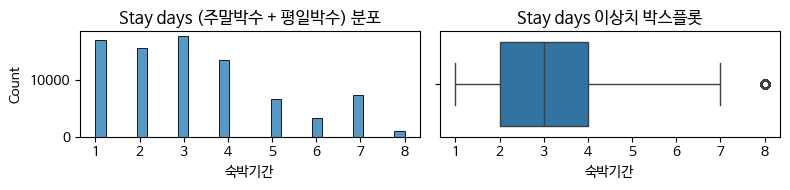

count    81616.000000
mean         3.263404
std          1.885984
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: stay_days, dtype: float64
IQR 자동계산 기준 이상치 제거 (-1.0 <= n <= 7.0) 후 shape: (81616, 34)
IQR 상업적 기준 이상치 제거 (1 <= n <= 8) 후 shape: (81616, 34)


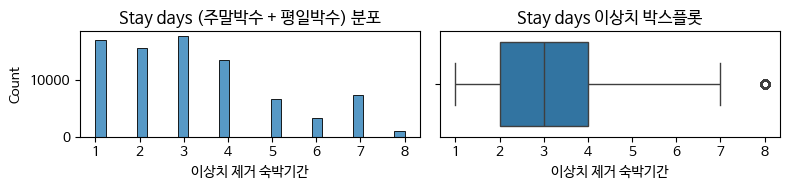

In [206]:
df = df_commit_0_5.copy()  # 테스트시 재실행을 위해서

# 이상치 확인

fig, axes = plt.subplots(1, 2, figsize=(8, 2))

sns.histplot(df['stay_days'], bins=30, ax=axes[0])
axes[0].set_title('Stay days (주말박수 + 평일박수) 분포')
axes[0].set_xlabel('숙박기간')
axes[0].set_ylabel('Count')

sns.boxplot(x=df['stay_days'], ax=axes[1])
axes[1].set_title('Stay days 이상치 박스플롯')
axes[1].set_xlabel('숙박기간')

plt.tight_layout()
plt.show()

# 장기 숙박자가 있을 수 있음으로 이상치 처리
print(df['stay_days'].describe())
Q1 = df['stay_days'].quantile(0.25)
Q3 = df['stay_days'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR 자동계산 기준 이상치 제거 ({lower_bound} <= n <= {upper_bound}) 후 shape: {df.shape}")
# 최소 1일, 최대 8일 기준으로 이상치 제거
lower_bound = 1
upper_bound = 8
df = df[(df['stay_days'] >= lower_bound) & (df['stay_days'] <= upper_bound)]
print(f"IQR 상업적 기준 이상치 제거 ({lower_bound} <= n <= {upper_bound}) 후 shape: {df.shape}")

fig, axes = plt.subplots(1, 2, figsize=(8, 2))

# 히스토그램
sns.histplot(df['stay_days'], bins=30, ax=axes[0])
axes[0].set_title('Stay days (주말박수 + 평일박수) 분포')
axes[0].set_xlabel('이상치 제거 숙박기간')
axes[0].set_ylabel('Count')

# 박스플롯
sns.boxplot(x=df['stay_days'], ax=axes[1])
axes[1].set_title('Stay days 이상치 박스플롯')
axes[1].set_xlabel('이상치 제거 숙박기간')

plt.tight_layout()
plt.show()

df_commit_0_5 = df.copy()  # 테스트시 재실행을 위해서

### 이상치 예약 인원 검토
- 1 ~ 8명을 제외한 인원 삭제

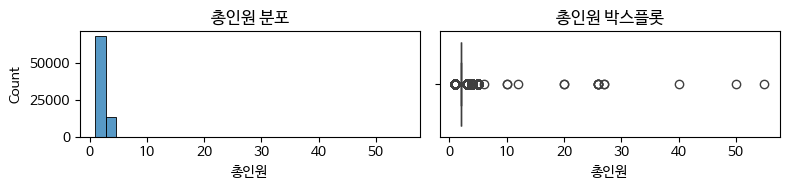

count    81616.000000
mean         2.030999
std          0.798728
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: total_guests, dtype: float64
IQR 자동계산 기준 이상치 제거 (2.0 <= n <= 2.0) 후 shape: (81616, 34)
IQR 상업적 기준 이상치 제거 (1 <= n <= 8) 후 shape: (81601, 34)


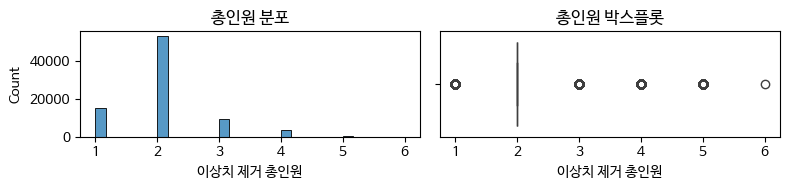

In [207]:
# 숙박인원 검토

df = df_commit_0_5.copy()  # 테스트시 재실행을 위해서

# 총인원 컬럼 생성 (성인수 + 아동수 + 유아수)

fig, axes = plt.subplots(1, 2, figsize=(8, 2))
sns.histplot(df['total_guests'], bins=30, ax=axes[0])
axes[0].set_title('총인원 분포')
axes[0].set_xlabel('총인원')
axes[0].set_ylabel('Count')

sns.boxplot(x=df['total_guests'], ax=axes[1])
axes[1].set_title('총인원 박스플롯')
axes[1].set_xlabel('총인원')

plt.tight_layout()
plt.show()

print(df['total_guests'].describe())
Q1 = df['total_guests'].quantile(0.25)
Q3 = df['total_guests'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR 자동계산 기준 이상치 제거 ({lower_bound} <= n <= {upper_bound}) 후 shape: {df.shape}")

# 최소 1명, 최대 8명 기준으로 이상치 제거
lower_bound = 1
upper_bound = 8

df = df[(df['total_guests'] >= lower_bound) & (df['total_guests'] <= upper_bound)]
print(f"IQR 상업적 기준 이상치 제거 ({lower_bound} <= n <= {upper_bound}) 후 shape: {df.shape}")

fig, axes = plt.subplots(1, 2, figsize=(8, 2))
sns.histplot(df['total_guests'], bins=30, ax=axes[0])
axes[0].set_title('총인원 분포')
axes[0].set_xlabel('이상치 제거 총인원')
axes[0].set_ylabel('Count')

sns.boxplot(x=df['total_guests'], ax=axes[1])
axes[1].set_title('총인원 박스플롯')
axes[1].set_xlabel('이상치 제거 총인원')
plt.tight_layout()
plt.show()

df_commit_0_6 = df.copy()  # 테스트시 재실행을 위해서

### 이상치 숙박 요금 검토
- 700만원 이상 데이터 삭제

count    81601.000000
mean        78.727454
std         68.719663
min          8.000000
25%         32.000000
50%         57.000000
75%        104.000000
max        767.000000
Name: room_price, dtype: float64


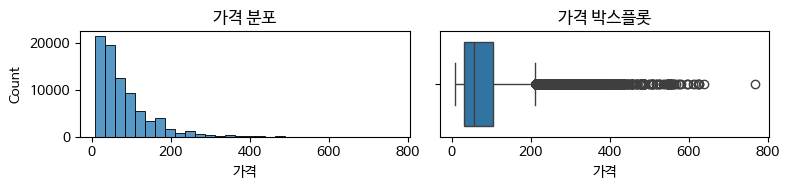

count    81601.000000
mean        78.727454
std         68.719663
min          8.000000
25%         32.000000
50%         57.000000
75%        104.000000
max        767.000000
Name: room_price, dtype: float64
IQR 기준 이상치 (0 < n < 212.0)
700만원 이상인 데이터 개수: 1


In [208]:
# 요금 검토

df = df_commit_0_6.copy()  # 테스트시 재실행을 위해서

print(df['room_price'].describe())

fig, axes = plt.subplots(1, 2, figsize=(8, 2))
sns.histplot(df['room_price'], bins=30, ax=axes[0])
axes[0].set_title('가격 분포')
axes[0].set_xlabel('가격')
axes[0].set_ylabel('Count')

sns.boxplot(x=df['room_price'], ax=axes[1])
axes[1].set_title('가격 박스플롯')
axes[1].set_xlabel('가격')

plt.tight_layout()
plt.show()

print(df['room_price'].describe())
Q1 = df['room_price'].quantile(0.25)
Q3 = df['room_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

print(f"IQR 기준 이상치 ({lower_bound} < n < {upper_bound})")
# # 금액이 몇백만원이면 너무 크다. 원인을 찾아보자
# sns.histplot(df['room_price'], bins=100)
# plt.tight_layout()
# plt.show()

# 700만원 이상은 이상치로 판단하자
print("700만원 이상인 데이터 개수:", df[df['room_price'] > 700].shape[0])
df = df[df['room_price'] <= 700].copy()

df_commit_0_6 = df.copy()  # 테스트시 재실행을 위해서


### 이상치 대기시간 검토
- 365일 이상 데이터 삭제

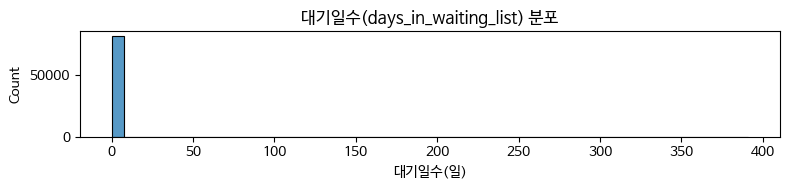

count    81600.000000
mean         0.762598
std         10.155105
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        391.000000
Name: days_in_waiting_list, dtype: float64
IQR  자동계산 기준 이상치 경계: 0.0 ~ 0.0일
IQR  상업적 기준 이상치 경계: 0.0 ~ 365.0일
이상치(대기일수) 데이터 개수: 8
       호텔타입    취소여부  예약기간          도착연도             도착월                   도착주                    도착일                주말박수             평일박수 성인수   아동수 유아수 식사타입    국가       시장구분             유통채널        재방문여부             이전취소수                     이전성공수         예약룸타입         배정룸타입      예약변경수 에이전트ID             대기일수                  주차공간수                특별요청수           예약상태              상태변경일     도착일     도착기간월    숙박일     숙박인원       요금   가족분류
          hotel is_canceled lead_time arrival_date_year arrival_date_month arrival_date_week_number arrival_date_day_of_month stays_in_weekend_nights stays_in_week_nights adults children babies     meal country market_segment distribution_channel is_repeate

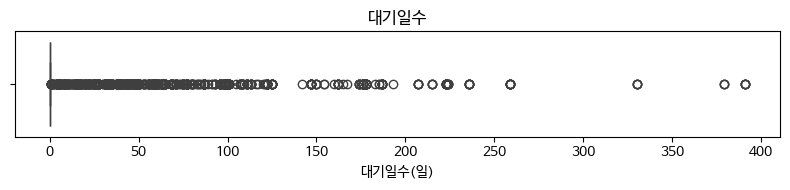

IQR 기준 이상치 제거 (0 < n < 365) 후 shape: (81592, 34)


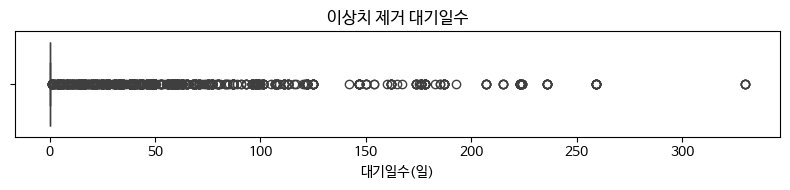

In [209]:
# 대기시간 검토

df = df_commit_0_6.copy()  # 테스트시 재실행을 위해서
plt.figure(figsize=(8, 2))
sns.histplot(df['days_in_waiting_list'], bins=50)
plt.title('대기일수(days_in_waiting_list) 분포')
plt.xlabel('대기일수(일)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print(df['days_in_waiting_list'].describe())

# IQR 기준 이상치 경계 계산
Q1 = df['days_in_waiting_list'].quantile(0.25)
Q3 = df['days_in_waiting_list'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR
print(f"IQR  자동계산 기준 이상치 경계: {lower_bound:.1f} ~ {upper_bound:.1f}일")

# 자동 계산된 IQR이 상업적인 수치와 너무 맞지 않아서 예상되는 최소 최대 일을 수동으로 입력
lower_bound = 0  # 최소 0일
upper_bound = 365  # 최대 365일
print(f"IQR  상업적 기준 이상치 경계: {lower_bound:.1f} ~ {upper_bound:.1f}일")

# 이상치 데이터 개수 확인
outlier_count = ((df['days_in_waiting_list'] < lower_bound) | (df['days_in_waiting_list'] > upper_bound)).sum()
print(f"이상치(대기일수) 데이터 개수: {outlier_count}")

# 이상치 데이터 샘플 확인
print(df[df['days_in_waiting_list'] > upper_bound].head_att())

plt.figure(figsize=(8, 2))
sns.boxplot(x=df['days_in_waiting_list'])
plt.title('대기일수')
plt.xlabel('대기일수(일)')
plt.tight_layout()
plt.show()

df = df[(df['days_in_waiting_list'] >= lower_bound) & (df['days_in_waiting_list'] <= upper_bound)]
print(f"IQR 기준 이상치 제거 ({lower_bound} < n < {upper_bound}) 후 shape: {df.shape}")

plt.figure(figsize=(8, 2))
sns.boxplot(x=df['days_in_waiting_list'])
plt.title('이상치 제거 대기일수')
plt.xlabel('대기일수(일)')
plt.tight_layout()
plt.show()

df_commit_0_7 = df.copy()  # 테스트시 재실행을 위해서


### 이상치 데이터 추가 검증

In [121]:
# 이상치 데이터 유무 검색
# 어른이 없거나, 예약 성공 했는데 숙박기간이 없거나 숙박인원이 없는 경우

df = df_commit_0_7.copy()  # 데이터 복원

# 성인 인원이 없는 경우
adults_zero = df[df['adults'] <= 0]
print(f"성인 인원이 0명인 데이터: {adults_zero.shape[0]}건")

# 예약 성공인데 숙박기간이 없는 경우 (is_canceled==0 and stay_days<=0)
success_no_stay = df[(df['is_canceled'] == 0) & (df['stay_days'] <= 0)]
print(f"예약 성공인데 숙박기간이 0인 데이터: {success_no_stay.shape[0]}건")

# 숙박인원이 0명인 경우
guests_zero = df[df['total_guests'] <= 0]
print(f"숙박인원이 0명인 데이터: {guests_zero.shape[0]}건")

# raise ValueError("자동 실행 중단 다음 검토")

성인 인원이 0명인 데이터: 0건
예약 성공인데 숙박기간이 0인 데이터: 0건
숙박인원이 0명인 데이터: 0건


## 정규화

In [122]:
df = df_commit_0_7.copy()  # 테스트시 재실행을 위해서


In [123]:
df.describe().head_att(20)

                 호텔타입            취소여부          예약기간           도착연도                   도착주                    도착일                주말박수             평일박수              성인수              아동수               유아수           식사타입              국가          시장구분             유통채널          재방문여부             이전취소수                     이전성공수         예약룸타입         배정룸타입         예약변경수         에이전트ID             대기일수                  주차공간수                특별요청수           예약상태             숙박일           숙박인원              요금            가족분류
                    hotel         is_canceled         lead_time  arrival_date_year arrival_date_week_number arrival_date_day_of_month stays_in_weekend_nights stays_in_week_nights              adults            children               babies               meal           country    market_segment distribution_channel   is_repeated_guest previous_cancellations previous_bookings_not_canceled reserved_room_type assigned_room_type    booking_changes              agent days_in_waiting_

In [124]:
from sklearn.preprocessing import MinMaxScaler

df = df_commit_0_7.copy()  # 테스트시 재실행을 위해서

num_cols = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'days_in_waiting_list',
    'required_car_parking_spaces', 'total_of_special_requests',
    'stay_days', 'total_guests', 'room_price'
]

col_map = df.get_head_att()  # 영문:한글 dict

print("정규화 전 min/max:")
for col in num_cols:
    print(f"{col_map.get(col, col)}: min={df_commit_0_6[col].min()}, max={df_commit_0_6[col].max()}")

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df_commit_0_7_norm = df.copy()  # 테스트시 재실행을 위해서

# df.get_head_att()

정규화 전 min/max:
예약기간: min=0, max=629
주말박수: min=0, max=3
평일박수: min=0, max=6
성인수: min=1, max=6
아동수: min=0, max=3
유아수: min=0, max=2
대기일수: min=0, max=391
주차공간수: min=0, max=8
특별요청수: min=0, max=5
숙박일: min=1, max=8
숙박인원: min=1, max=6
요금: min=8, max=640


## EDA
### 호텔별 상관분석

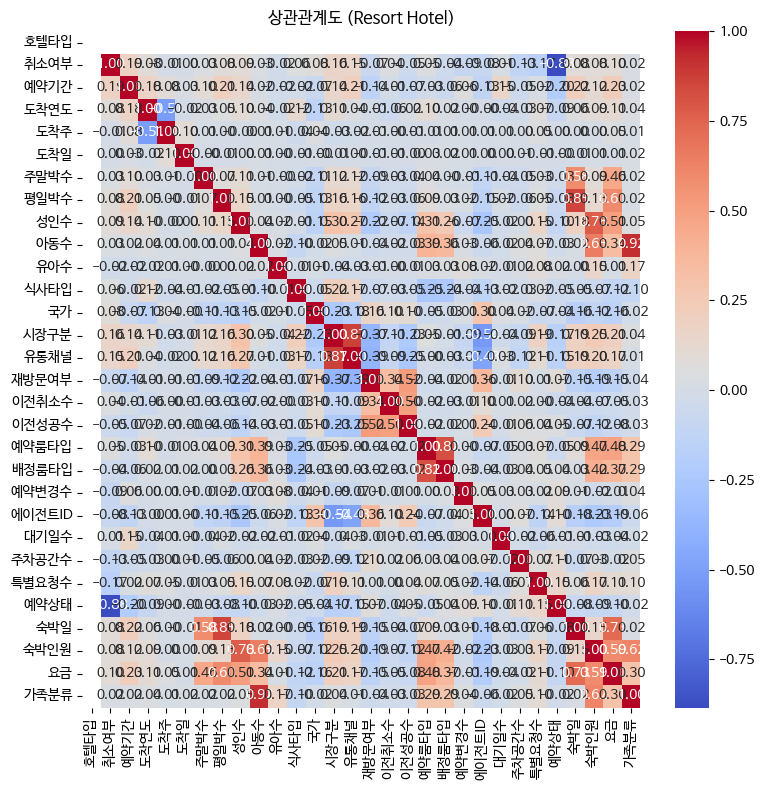

In [211]:
df = df_commit_0_7_norm.copy()  # 테스트시 재실행을 위해서

kor_map = df.get_head_att()

# Resort Hotel (hotel==0)
df0 = df[df['hotel'] == 0].select_dtypes(include=['number'])
corr0 = df0.corr()
corr0.index = [kor_map.get(col, col) for col in corr0.index]
corr0.columns = [kor_map.get(col, col) for col in corr0.columns]

plt.figure(figsize=(8, 8))
sns.heatmap(corr0, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('상관관계도 (Resort Hotel)')
plt.tight_layout()
plt.show()

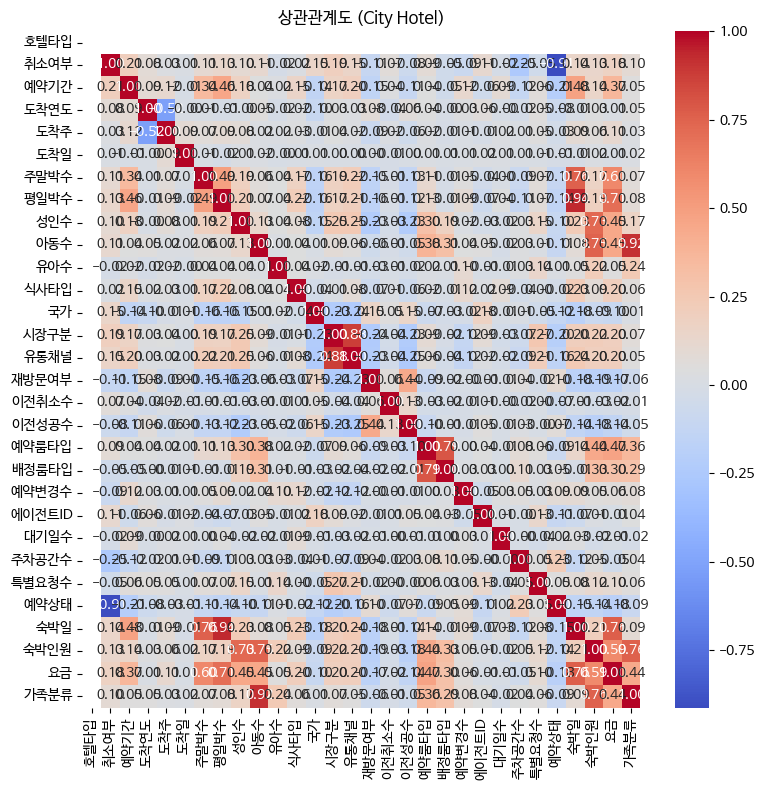

In [212]:
df = df_commit_0_7_norm.copy()  # 테스트시 재실행을 위해서

kor_map = df.get_head_att()

# City Hotel (hotel==1)
df1 = df[df['hotel'] == 1].select_dtypes(include=['number'])
corr1 = df1.corr()
corr1.index = [kor_map.get(col, col) for col in corr1.index]
corr1.columns = [kor_map.get(col, col) for col in corr1.columns]

plt.figure(figsize=(8, 8))
sns.heatmap(corr1, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('상관관계도 (City Hotel)')
plt.tight_layout()
plt.show()

- 상관도에서 취소요인에 대한 추가 적인 발견이 안됨

- 선택과 집중을 위하여 높은 매출 기간의 취소 요인 분석

### 매출, 예약, 취소 비교

In [126]:
df = df_commit_0_7.copy()  # 데이터 복원

month_map = {
    'January': '1월', 'February': '2월', 'March': '3월', 'April': '4월',
    'May': '5월', 'June': '6월', 'July': '7월', 'August': '8월',
    'September': '9월', 'October': '10월', 'November': '11월', 'December': '12월'
}
df['월'] = df['arrival_date_month'].map(month_map)

hotel_names = {0: 'Resort Hotel', 1: 'City Hotel'}

# 호텔별 전체 집계
print("==== 호텔별 전체 집계 ====")
for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code]
    total = len(df_hotel)
    canceled = df_hotel['is_canceled'].sum()
    cancel_rate = canceled / total if total > 0 else 0
    print(f"[{hotel_name}] 총 예약: {total:,}건, 취소: {canceled:,}건, 취소비율: {cancel_rate:.2%}")

# 년월별 집계
print("\n==== 년월별 집계 ====")
for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code]
    monthly = df_hotel.groupby('arr_year_month').agg(
        예약건수=('is_canceled', 'count'),
        취소건수=('is_canceled', 'sum')
    ).reset_index()
    monthly['취소비율'] = monthly['취소건수'] / monthly['예약건수']
    print(f"\n[{hotel_name}] 년월별 예약/취소/취소비율")
    display(monthly)

# 1~12월 월별 집계
print("\n==== 1~12월 월별 집계 ====")
for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code].copy()
    monthly = df_hotel.groupby('월').agg(
        예약건수=('is_canceled', 'count'),
        취소건수=('is_canceled', 'sum'),
        매출합계=('room_price', 'sum')
    ).reset_index()
    monthly['취소비율'] = monthly['취소건수'] / monthly['예약건수']
    monthly['매출비율'] = monthly['매출합계'] / monthly['매출합계'].sum()
    print(f"\n[{hotel_name}] 1~12월 월별 예약/취소/취소비율/매출합계/매출비율")
    display(monthly)

# 여기서 강제로 Err발생
#raise ValueError("강제로 발생시킨 오류입니다. 데이터 분석을 중단합니다.")

==== 호텔별 전체 집계 ====
[Resort Hotel] 총 예약: 51,512건, 취소: 15,384건, 취소비율: 29.86%
[City Hotel] 총 예약: 30,080건, 취소: 7,117건, 취소비율: 23.66%

==== 년월별 집계 ====

[Resort Hotel] 년월별 예약/취소/취소비율


,arr_year_month,예약건수,취소건수,취소비율
0,2015-07,360,211,0.586111
1,2015-08,1054,220,0.208729
2,2015-09,1626,302,0.185732
3,2015-10,1517,284,0.187212
4,2015-11,769,130,0.169051
5,2015-12,971,207,0.213182
6,2016-01,952,180,0.189076
7,2016-02,1551,331,0.213411
8,2016-03,2285,622,0.272210
9,2016-04,2362,734,0.310754



[City Hotel] 년월별 예약/취소/취소비율


,arr_year_month,예약건수,취소건수,취소비율
0,2015-07,1116,256,0.229391
1,2015-08,1173,302,0.257460
2,2015-09,958,219,0.228601
3,2015-10,1035,131,0.126570
4,2015-11,781,97,0.124200
5,2015-12,882,130,0.147392
6,2016-01,769,80,0.104031
7,2016-02,1073,135,0.125815
8,2016-03,1370,220,0.160584
9,2016-04,1250,244,0.195200



==== 1~12월 월별 집계 ====

[Resort Hotel] 1~12월 월별 예약/취소/취소비율/매출합계/매출비율


,월,예약건수,취소건수,매출합계,취소비율,매출비율
0,10월,4069,1106,231266,0.271811,0.065073
1,11월,2821,701,143399,0.248493,0.040349
2,12월,2864,919,183545,0.320880,0.051646
3,1월,2550,680,138848,0.266667,0.039069
4,2월,3434,905,206877,0.263541,0.058211
5,3월,4705,1322,284357,0.280978,0.080012
6,4월,4974,1715,329812,0.344793,0.092802
7,5월,5292,1713,303561,0.323696,0.085415
8,6월,4866,1474,285097,0.302918,0.080220
9,7월,5490,1798,566396,0.327505,0.159371



[City Hotel] 1~12월 월별 예약/취소/취소비율/매출합계/매출비율


,월,예약건수,취소건수,매출합계,취소비율,매출비율
0,10월,2476,474,188113,0.191438,0.065562
1,11월,1886,293,108912,0.155355,0.037958
2,12월,1944,356,118599,0.183128,0.041334
3,1월,1843,254,86857,0.137819,0.030272
4,2월,2338,409,132341,0.174936,0.046124
5,3월,2424,415,157665,0.171205,0.054950
6,4월,2632,614,208943,0.233283,0.072821
7,5월,2573,628,219999,0.244073,0.076675
8,6월,2242,708,217493,0.315789,0.075801
9,7월,3667,1127,587293,0.307336,0.204685


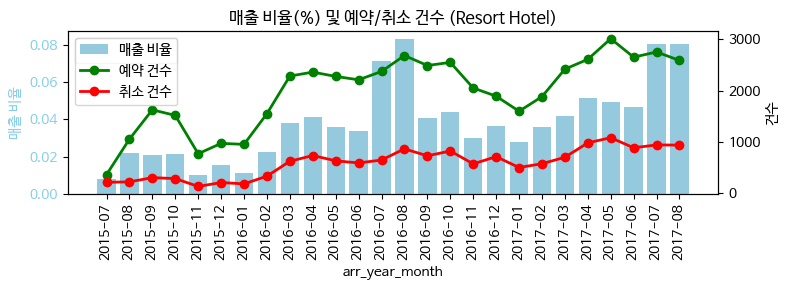

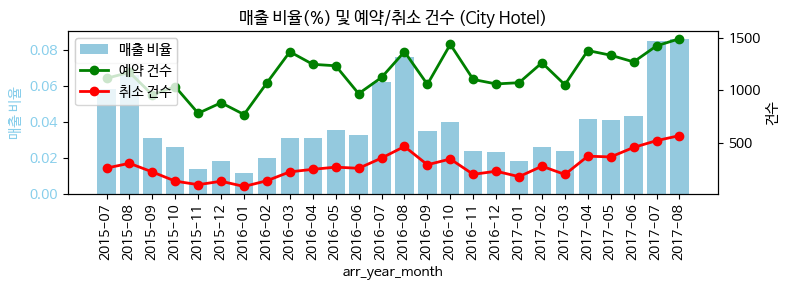

In [214]:
df = df_commit_0_7.copy()  # 테스트시 재실행을 위해서

hotel_names = {0: 'Resort Hotel', 1: 'City Hotel'}
for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code]
    monthly = df_hotel.groupby('arr_year_month').agg(
        매출합계=('room_price', 'sum'),
        예약건수=('room_price', 'count'),
        취소건수=('is_canceled', 'sum')
    ).reset_index()
    monthly['매출비율'] = monthly['매출합계'] / monthly['매출합계'].sum()

    fig, ax1 = plt.subplots(figsize=(8, 3))

    sns.barplot(x='arr_year_month', y='매출비율', data=monthly, ax=ax1, color='skyblue', label='매출 비율')
    ax1.set_ylabel('매출 비율', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')

    ax2 = ax1.twinx()
    ax2.plot(monthly['arr_year_month'], monthly['예약건수'], color='green', marker='o', label='예약 건수', linewidth=2)
    ax2.plot(monthly['arr_year_month'], monthly['취소건수'], color='red', marker='o', label='취소 건수', linewidth=2)
    ax2.set_ylabel('건수', color='black')
    ax2.tick_params(axis='y', labelcolor='black')

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

    plt.setp(ax1.get_xticklabels(), rotation=90, ha='center')
    plt.xlabel('도착기간월')
    plt.title(f'매출 비율(%) 및 예약/취소 건수 ({hotel_name})')
    plt.tight_layout()
    plt.show()



[Resort Hotel] 숙박 기간별 매출 합계 및 비율:


,stay_days,room_price,매출비율
0,1,205677,0.057873
1,2,456151,0.128351
2,3,897541,0.252548
3,4,873630,0.245820
4,5,485312,0.136556
5,6,235390,0.066234
6,7,329956,0.092842
7,8,70280,0.019775


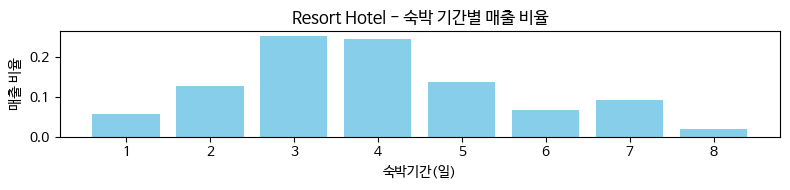

In [215]:
df = df_commit_0_7.copy()  # 데이터 복원

# 출력결과물 스크롤 되지 않도록 2셀로 나눔
hotel_names = {0: 'Resort Hotel'}
for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code]
    stay_sales = df_hotel.groupby('stay_days')['room_price'].sum().reset_index()
    stay_sales['매출비율'] = stay_sales['room_price'] / stay_sales['room_price'].sum()

    print(f"\n[{hotel_name}] 숙박 기간별 매출 합계 및 비율:")
    display(stay_sales)

    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 2))
    plt.bar(stay_sales['stay_days'], stay_sales['매출비율'], color='skyblue')
    plt.xlabel('숙박기간(일)')
    plt.ylabel('매출 비율')
    plt.title(f'{hotel_name} - 숙박 기간별 매출 비율')
    plt.xticks(stay_sales['stay_days'])
    plt.tight_layout()
    plt.show()


[City Hotel] 숙박 기간별 매출 합계 및 비율:


,stay_days,room_price,매출비율
0,1,138419,0.048242
1,2,220950,0.077006
2,3,308435,0.107496
3,4,391299,0.136376
4,5,345635,0.120461
5,6,279697,0.097481
6,7,1032033,0.359686
7,8,152791,0.053251


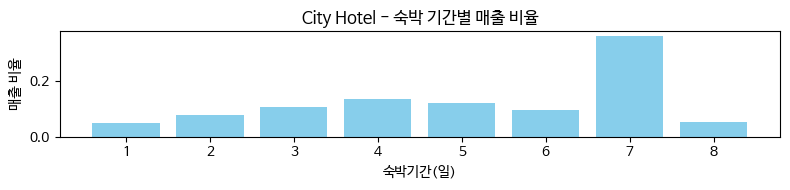

In [216]:
df = df_commit_0_7.copy()  # 데이터 복원

# 출력결과물 스크롤 되지 않도록 2셀로 나눔
hotel_names = {1: 'City Hotel'}
for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code]
    stay_sales = df_hotel.groupby('stay_days')['room_price'].sum().reset_index()
    stay_sales['매출비율'] = stay_sales['room_price'] / stay_sales['room_price'].sum()

    print(f"\n[{hotel_name}] 숙박 기간별 매출 합계 및 비율:")
    display(stay_sales)

    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 2))
    plt.bar(stay_sales['stay_days'], stay_sales['매출비율'], color='skyblue')
    plt.xlabel('숙박기간(일)')
    plt.ylabel('매출 비율')
    plt.title(f'{hotel_name} - 숙박 기간별 매출 비율')
    plt.xticks(stay_sales['stay_days'])
    plt.tight_layout()
    plt.show()


[Resort Hotel] 숙박일/인원별 매출 비중(%)


total_guests,1,2,3,4,5
stay_days,,,,,
1,1.04,3.07,1.08,0.55,0.04
2,1.35,7.54,2.78,1.10,0.06
3,1.59,15.46,5.93,2.13,0.15
4,1.09,15.49,6.01,1.88,0.12
5,0.60,8.58,3.29,1.12,0.06
6,0.28,4.07,1.65,0.58,0.04
7,0.31,5.66,2.70,0.55,0.06
8,0.14,1.10,0.52,0.22,0.00


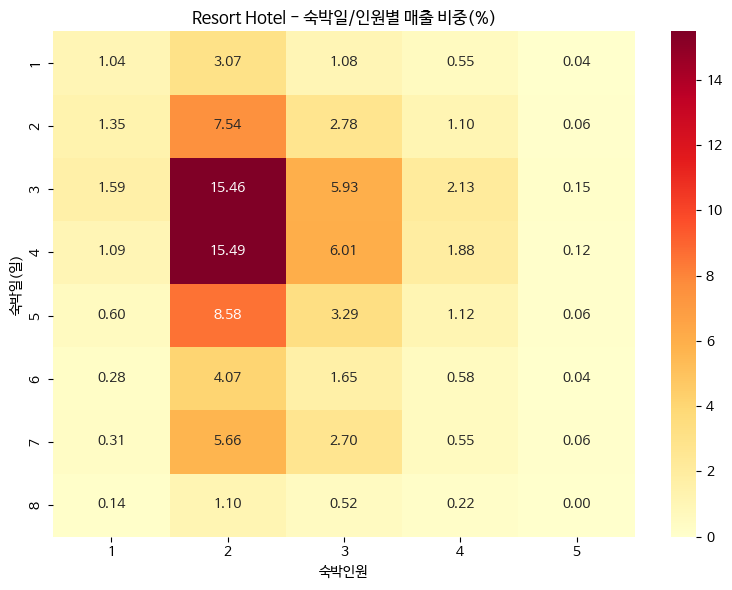

In [159]:
df = df_commit_0_7.copy()  # 데이터셋 복원

hotel_names = {0: 'Resort Hotel'}
for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code]
    total_sales = df_hotel['room_price'].sum()
    pivot = pd.pivot_table(
        df_hotel,
        values='room_price',
        index='stay_days',
        columns='total_guests',
        aggfunc='sum',
        fill_value=0
    )
    pivot_ratio = pivot / total_sales * 100
    print(f"\n[{hotel_name}] 숙박일/인원별 매출 비중(%)")
    display(pivot_ratio.round(2))

    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(8, 6))
    sns.heatmap(pivot_ratio, annot=True, fmt=".2f", cmap="YlOrRd")
    plt.title(f"{hotel_name} - 숙박일/인원별 매출 비중(%)")
    plt.xlabel("숙박인원")
    plt.ylabel("숙박일(일)")
    plt.tight_layout()
    plt.show()


[City Hotel] 숙박일/인원별 매출 비중(%)


total_guests,1,2,3,4,5,6
stay_days,,,,,,
1,0.89,3.10,0.33,0.49,0.02,0.00
2,0.68,5.14,0.74,1.09,0.04,0.00
3,0.60,7.20,1.20,1.72,0.04,0.00
4,0.65,9.04,1.76,2.18,0.01,0.00
5,0.41,7.54,1.92,2.15,0.03,0.00
6,0.21,6.00,1.59,1.88,0.07,0.00
7,1.01,24.42,5.60,4.84,0.08,0.02
8,0.21,3.38,0.80,0.92,0.01,0.00


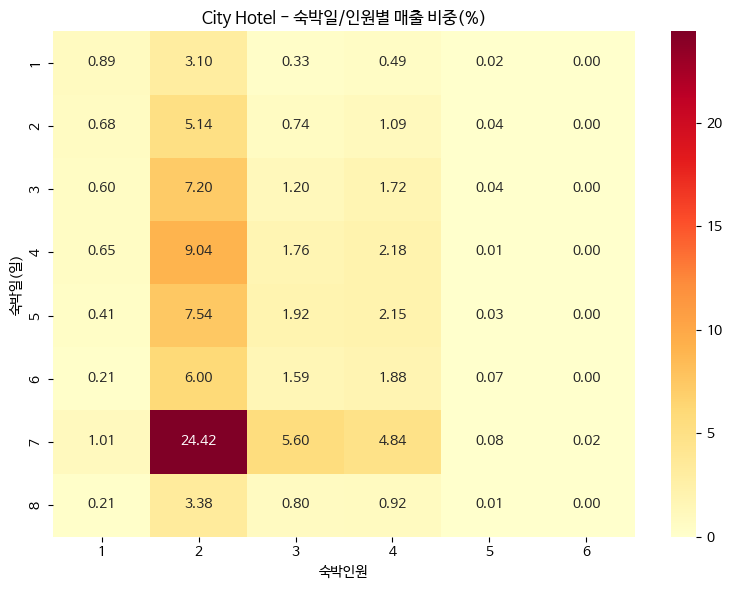

In [160]:
df = df_commit_0_7.copy()  # 데이터셋 복원

hotel_names = {1: 'City Hotel'}
for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code]
    total_sales = df_hotel['room_price'].sum()
    pivot = pd.pivot_table(
        df_hotel,
        values='room_price',
        index='stay_days',
        columns='total_guests',
        aggfunc='sum',
        fill_value=0
    )
    pivot_ratio = pivot / total_sales * 100
    print(f"\n[{hotel_name}] 숙박일/인원별 매출 비중(%)")
    display(pivot_ratio.round(2))

    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(8, 6))
    sns.heatmap(pivot_ratio, annot=True, fmt=".2f", cmap="YlOrRd")
    plt.title(f"{hotel_name} - 숙박일/인원별 매출 비중(%)")
    plt.xlabel("숙박인원")
    plt.ylabel("숙박일(일)")
    plt.tight_layout()
    plt.show()

In [162]:
df = df_commit_0_7.copy()  # 데이터 복원

df['arr_date'] = pd.to_datetime(df['arr_date'])
df['arr_year_month'] = df['arr_date'].dt.strftime('%Y-%m')

hotel_names = {0: 'Resort Hotel'}

import matplotlib.pyplot as plt
import seaborn as sns

for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code].copy()

    monthly = df_hotel.groupby('arr_year_month').agg(
        예약건수=('is_canceled', 'count'),
        취소건수=('is_canceled', 'sum')
    ).reset_index()
    monthly['취소율'] = monthly['취소건수'] / monthly['예약건수']

    df_cancel = df_hotel[df_hotel['is_canceled'] == 1].copy()
    df_cancel['어린이포함'] = ((df_cancel['children'] > 0) | (df_cancel['babies'] > 0)).astype(int)
    child_cancel = df_cancel.groupby('arr_year_month')['어린이포함'].mean().reset_index()
    child_cancel.rename(columns={'어린이포함': '취소 중 어린이포함 비율'}, inplace=True)

    monthly = pd.merge(monthly, child_cancel, on='arr_year_month', how='left').fillna(0)

    print(f"\n[{hotel_name}] 월별 취소율/취소 중 어린이포함 비율")
    display(monthly)


[Resort Hotel] 월별 취소율/취소 중 어린이포함 비율


,arr_year_month,예약건수,취소건수,취소율,취소 중 어린이포함 비율
0,2015-07,360,211,0.586111,0.018957
1,2015-08,1054,220,0.208729,0.059091
2,2015-09,1626,302,0.185732,0.033113
3,2015-10,1517,284,0.187212,0.028169
4,2015-11,769,130,0.169051,0.038462
5,2015-12,971,207,0.213182,0.101449
6,2016-01,952,180,0.189076,0.055556
7,2016-02,1551,331,0.213411,0.060423
8,2016-03,2285,622,0.272210,0.107717
9,2016-04,2362,734,0.310754,0.115804


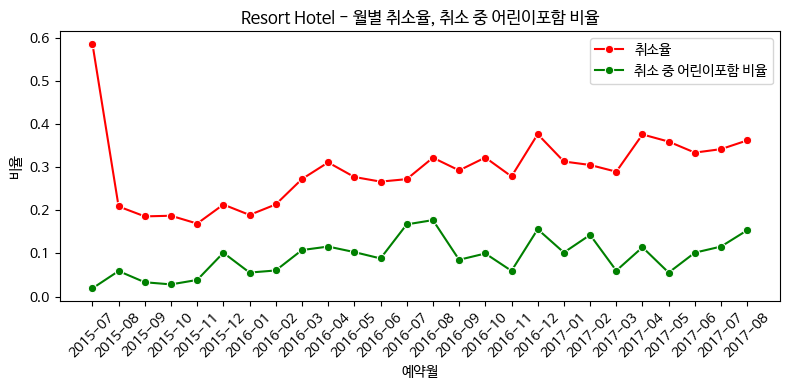

In [217]:
df = df_commit_0_7.copy()  # 데이터 복원

df['arr_date'] = pd.to_datetime(df['arr_date'])
df['arr_year_month'] = df['arr_date'].dt.strftime('%Y-%m')

hotel_names = {0: 'Resort Hotel'}

import matplotlib.pyplot as plt
import seaborn as sns

for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code].copy()

    monthly = df_hotel.groupby('arr_year_month').agg(
        예약건수=('is_canceled', 'count'),
        취소건수=('is_canceled', 'sum')
    ).reset_index()
    monthly['취소율'] = monthly['취소건수'] / monthly['예약건수']

    df_cancel = df_hotel[df_hotel['is_canceled'] == 1].copy()
    df_cancel['어린이포함'] = ((df_cancel['children'] > 0) | (df_cancel['babies'] > 0)).astype(int)
    child_cancel = df_cancel.groupby('arr_year_month')['어린이포함'].mean().reset_index()
    child_cancel.rename(columns={'어린이포함': '취소 중 어린이포함 비율'}, inplace=True)

    monthly = pd.merge(monthly, child_cancel, on='arr_year_month', how='left').fillna(0)

    plt.figure(figsize=(8, 4))
    sns.lineplot(data=monthly, x='arr_year_month', y='취소율', marker='o', color='red', label='취소율')
    sns.lineplot(data=monthly, x='arr_year_month', y='취소 중 어린이포함 비율', marker='o', color='green', label='취소 중 어린이포함 비율')
    plt.xticks(rotation=45)
    plt.xlabel('예약월')
    plt.ylabel('비율')
    plt.title(f'{hotel_name} - 월별 취소율, 취소 중 어린이포함 비율')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [164]:
df = df_commit_0_7.copy()  # 데이터 복원

df['arr_date'] = pd.to_datetime(df['arr_date'])
df['arr_year_month'] = df['arr_date'].dt.strftime('%Y-%m')

hotel_names = {1: 'City Hotel'}

import matplotlib.pyplot as plt
import seaborn as sns

for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code].copy()

    monthly = df_hotel.groupby('arr_year_month').agg(
        예약건수=('is_canceled', 'count'),
        취소건수=('is_canceled', 'sum')
    ).reset_index()
    monthly['취소율'] = monthly['취소건수'] / monthly['예약건수']

    df_cancel = df_hotel[df_hotel['is_canceled'] == 1].copy()
    df_cancel['어린이포함'] = ((df_cancel['children'] > 0) | (df_cancel['babies'] > 0)).astype(int)
    child_cancel = df_cancel.groupby('arr_year_month')['어린이포함'].mean().reset_index()
    child_cancel.rename(columns={'어린이포함': '취소 중 어린이포함 비율'}, inplace=True)

    monthly = pd.merge(monthly, child_cancel, on='arr_year_month', how='left').fillna(0)

    print(f"\n[{hotel_name}] 월별 취소율/취소 중 어린이포함 비율")
    display(monthly)



[City Hotel] 월별 취소율/취소 중 어린이포함 비율


,arr_year_month,예약건수,취소건수,취소율,취소 중 어린이포함 비율
0,2015-07,1116,256,0.229391,0.128906
1,2015-08,1173,302,0.257460,0.172185
2,2015-09,958,219,0.228601,0.077626
3,2015-10,1035,131,0.126570,0.129771
4,2015-11,781,97,0.124200,0.082474
5,2015-12,882,130,0.147392,0.107692
6,2016-01,769,80,0.104031,0.050000
7,2016-02,1073,135,0.125815,0.177778
8,2016-03,1370,220,0.160584,0.127273
9,2016-04,1250,244,0.195200,0.094262


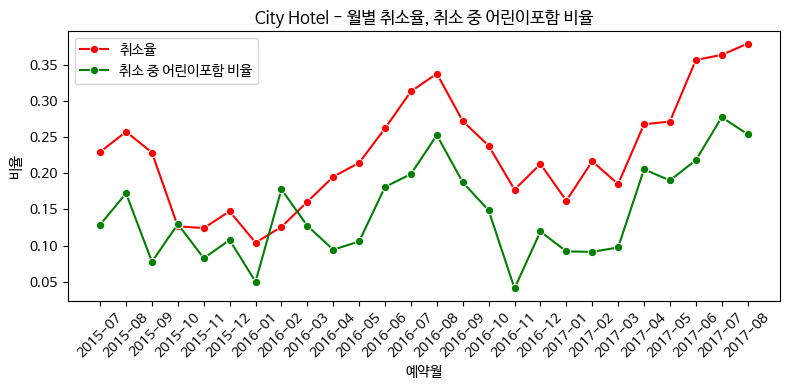

In [218]:
df = df_commit_0_7.copy()  # 데이터 복원

df['arr_date'] = pd.to_datetime(df['arr_date'])
df['arr_year_month'] = df['arr_date'].dt.strftime('%Y-%m')

hotel_names = {1: 'City Hotel'}

import matplotlib.pyplot as plt
import seaborn as sns

for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code].copy()

    monthly = df_hotel.groupby('arr_year_month').agg(
        예약건수=('is_canceled', 'count'),
        취소건수=('is_canceled', 'sum')
    ).reset_index()
    monthly['취소율'] = monthly['취소건수'] / monthly['예약건수']

    df_cancel = df_hotel[df_hotel['is_canceled'] == 1].copy()
    df_cancel['어린이포함'] = ((df_cancel['children'] > 0) | (df_cancel['babies'] > 0)).astype(int)
    child_cancel = df_cancel.groupby('arr_year_month')['어린이포함'].mean().reset_index()
    child_cancel.rename(columns={'어린이포함': '취소 중 어린이포함 비율'}, inplace=True)

    monthly = pd.merge(monthly, child_cancel, on='arr_year_month', how='left').fillna(0)

    plt.figure(figsize=(8, 4))
    sns.lineplot(data=monthly, x='arr_year_month', y='취소율', marker='o', color='red', label='취소율')
    sns.lineplot(data=monthly, x='arr_year_month', y='취소 중 어린이포함 비율', marker='o', color='green', label='취소 중 어린이포함 비율')
    plt.xticks(rotation=45)
    plt.xlabel('예약월')
    plt.ylabel('비율')
    plt.title(f'{hotel_name} - 월별 취소율, 취소 중 어린이포함 비율')
    plt.legend()
    plt.tight_layout()
    plt.show()





[리조트 호텔] 숙박기간 3~4일, 예약 유지(취소X) 고객 가족 유형 분포:
guest_type
0    14200
1      101
2     1275
3       18
Name: count, dtype: int64


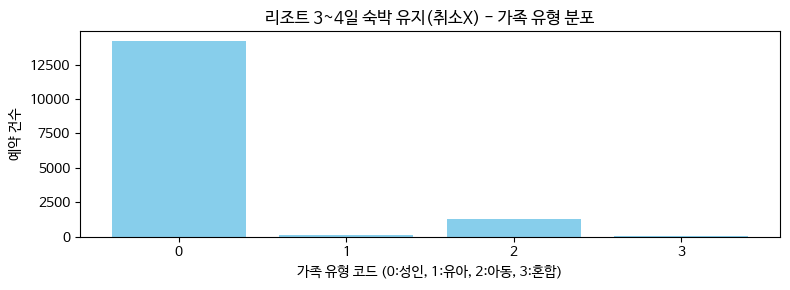


[리조트 호텔] 숙박기간 3~4일, 예약 취소 고객 가족 유형 분포:
guest_type
0    6505
1      23
2     706
3       8
Name: count, dtype: int64


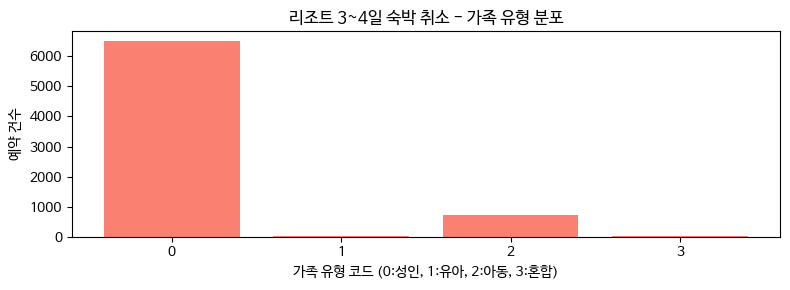

In [131]:
df = df_commit_0_7.copy()  # 데이터 복원

# 리조트 호텔, 숙박기간 3~4일에 집중
target_hotel = 0  # 리조트 호텔
target_days = [3, 4]

df_resort = df[(df['hotel'] == target_hotel) & (df['stay_days'].isin(target_days))]

for canceled, label in zip([0, 1], ['유지(취소X)', '취소']):
    group = df_resort[df_resort['is_canceled'] == canceled]
    family_counts = group['guest_type'].value_counts().sort_index()
    print(f"\n[리조트 호텔] 숙박기간 3~4일, 예약 {label} 고객 가족 유형 분포:")
    print(family_counts)

    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 3))
    plt.bar(family_counts.index, family_counts.values, color='skyblue' if canceled == 0 else 'salmon')
    plt.xlabel('가족 유형 코드 (0:성인, 1:유아, 2:아동, 3:혼합)')
    plt.ylabel('예약 건수')
    plt.title(f'리조트 3~4일 숙박 {label} - 가족 유형 분포')
    plt.xticks([0, 1, 2, 3])
    plt.tight_layout()
    plt.show()


[리조트/호텔] 숙박기간 3~4일, 예약 유지 고객 상관관계도:


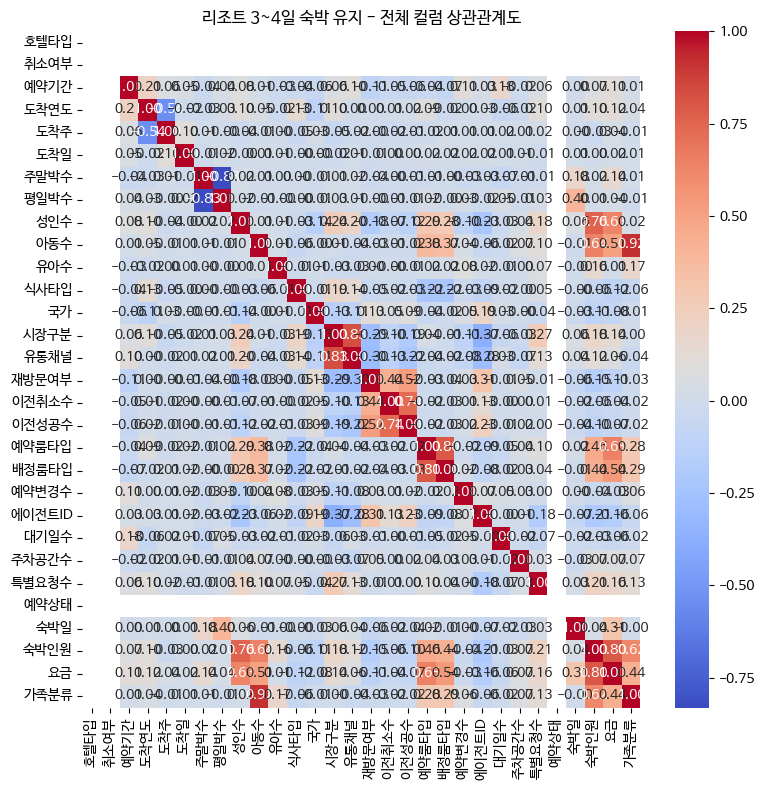

In [170]:
# 숙박 유치 상관 도
# 상관도 검토 (컬럼 한글화)
df = df_commit_0_7.copy()  # 데이터 복원

kor_map = df.get_head_att()  # 영문:한글 컬럼명 매핑

target_hotel = 0
target_days = [3, 4]
df_resort = df[(df['hotel'] == target_hotel) & (df['stay_days'].isin(target_days))]

for canceled, label in zip([0, 1], ['유지']):
    group = df_resort[df_resort['is_canceled'] == canceled]
    num_cols = group.select_dtypes(include=['number'])
    corr = num_cols.corr()

    corr.index = [kor_map.get(col, col) for col in corr.index]
    corr.columns = [kor_map.get(col, col) for col in corr.columns]
    print(f"\n[리조트/호텔] 숙박기간 3~4일, 예약 {label} 고객 상관관계도:")
    plt.figure(figsize=(8, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'리조트 3~4일 숙박 {label} - 전체 컬럼 상관관계도')
    plt.tight_layout()
    plt.show()


[리조트/호텔] 숙박기간 3~4일, 예약 취소 고객 상관관계도:


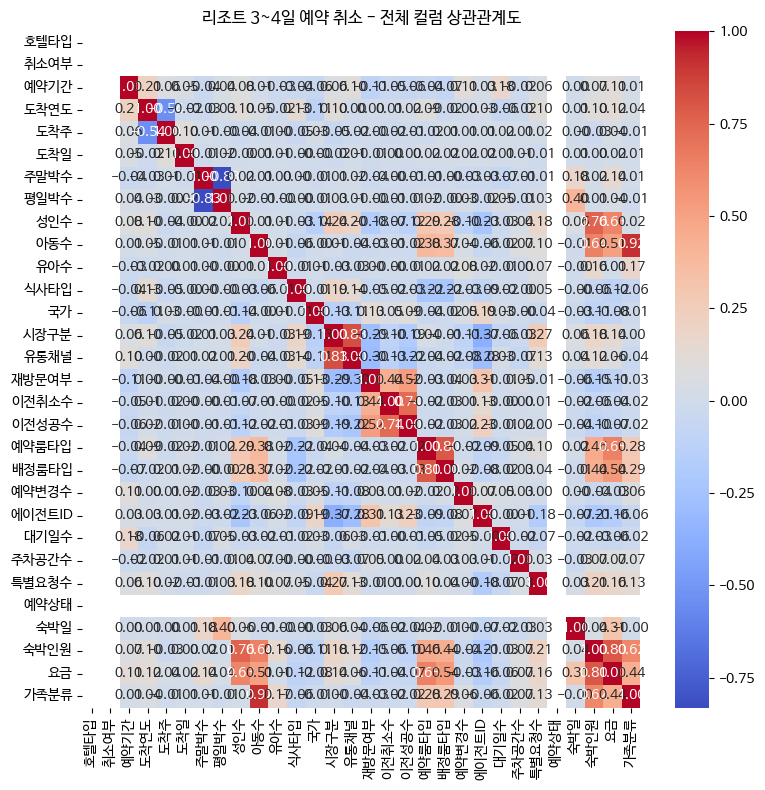

In [172]:
# 숙박 취소 상관 도

# 상관도 검토 (컬럼 한글화)
df = df_commit_0_7.copy()  # 데이터 복원

kor_map = df.get_head_att()  # 영문:한글 컬럼명 매핑

target_hotel = 0
target_days = [3, 4]
df_resort = df[(df['hotel'] == target_hotel) & (df['stay_days'].isin(target_days))]

for canceled, label in zip([0, 1], ['취소']):
    group = df_resort[df_resort['is_canceled'] == canceled]
    num_cols = group.select_dtypes(include=['number'])
    corr = num_cols.corr()

    corr.index = [kor_map.get(col, col) for col in corr.index]
    corr.columns = [kor_map.get(col, col) for col in corr.columns]
    print(f"\n[리조트/호텔] 숙박기간 3~4일, 예약 {label} 고객 상관관계도:")
    plt.figure(figsize=(8, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'리조트 3~4일 예약 {label} - 전체 컬럼 상관관계도')
    plt.tight_layout()
    plt.show()

In [ ]:
# 상관도 검토 (컬럼 한글화)
df = df_commit_0_7.copy()  # 데이터 복원

kor_map = df.get_head_att()  # 영문:한글 컬럼명 매핑

target_hotel = 0
target_days = [3, 4]
df_resort = df[(df['hotel'] == target_hotel) & (df['stay_days'].isin(target_days))]

for canceled, label in zip([0, 1], ['유지(취소X)', '취소']):
    group = df_resort[df_resort['is_canceled'] == canceled]
    num_cols = group.select_dtypes(include=['number'])
    corr = num_cols.corr()

    corr.index = [kor_map.get(col, col) for col in corr.index]
    corr.columns = [kor_map.get(col, col) for col in corr.columns]
    print(f"\n[리조트 호텔] 숙박기간 3~4일, 예약 {label} 고객 상관관계도:")
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(8, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'리조트 3~4일 숙박 {label} - 전체 컬럼 상관관계도')
    plt.tight_layout()
    plt.show()

In [133]:
df.head_att(1)

   호텔타입    취소여부  예약기간          도착연도             도착월                   도착주                    도착일                주말박수             평일박수 성인수   아동수 유아수 식사타입    국가       시장구분             유통채널        재방문여부             이전취소수                     이전성공수         예약룸타입         배정룸타입      예약변경수 에이전트ID             대기일수                  주차공간수                특별요청수           예약상태              상태변경일     도착일     도착기간월    숙박일     숙박인원       요금   가족분류
      hotel is_canceled lead_time arrival_date_year arrival_date_month arrival_date_week_number arrival_date_day_of_month stays_in_weekend_nights stays_in_week_nights adults children babies     meal country market_segment distribution_channel is_repeated_guest previous_cancellations previous_bookings_not_canceled reserved_room_type assigned_room_type booking_changes      agent days_in_waiting_list required_car_parking_spaces total_of_special_requests reservation_status reservation_status_date   arr_date arr_year_month stay_days total_guests room_price guest_t


[Resort Hotel] 방타입별 매출 합계 및 비율:


,reserved_room_type,room_price,매출비율
0,0,1960874,0.551747
1,1,58518,0.016466
2,2,587,0.000165
3,3,1048093,0.294910
4,4,157650,0.044359
5,5,254728,0.071675
6,6,73487,0.020678


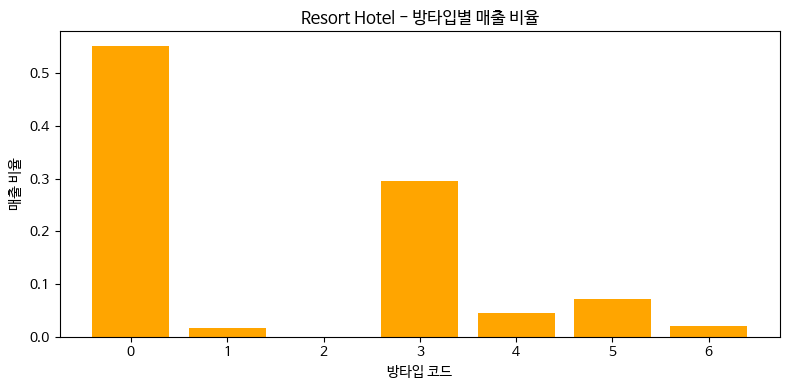

In [174]:
df = df_commit_0_7.copy()  # 데이터 복원

hotel_names = {0: 'Resort Hotel'}
for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code]

    # 방타입별 매출 합계 및 비율
    room_sales = df_hotel.groupby('reserved_room_type')['room_price'].sum().reset_index()
    room_sales['매출비율'] = room_sales['room_price'] / df_hotel['room_price'].sum()

    print(f"\n[{hotel_name}] 방타입별 매출 합계 및 비율:")
    display(room_sales)

    plt.figure(figsize=(8, 4))
    plt.bar(room_sales['reserved_room_type'], room_sales['매출비율'], color='orange')
    plt.xlabel('방타입 코드')
    plt.ylabel('매출 비율')
    plt.title(f'{hotel_name} - 방타입별 매출 비율')
    plt.xticks(room_sales['reserved_room_type'])
    plt.tight_layout()
    plt.show()


[City Hotel] 방타입별 매출 합계 및 비율:


,reserved_room_type,room_price,매출비율
0,0,1056239,0.368123
1,1,98,0.000034
2,2,146539,0.051072
3,3,654757,0.228197
4,4,467520,0.162941
5,5,122348,0.042641
6,6,293505,0.102293
7,7,127866,0.044564
8,8,387,0.000135


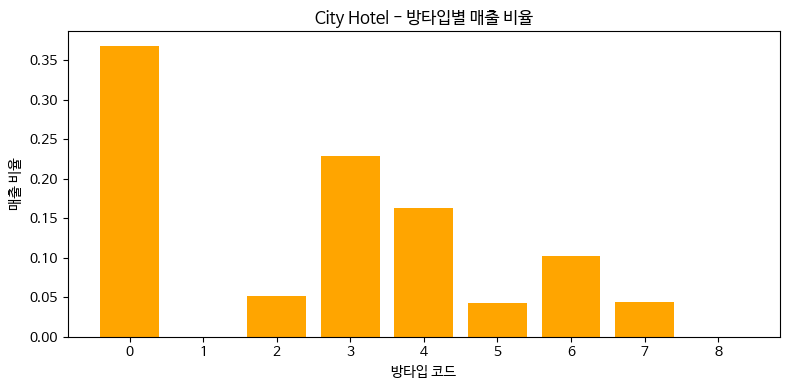

In [175]:
df = df_commit_0_7.copy()  # 데이터 복원

hotel_names = {1: 'City Hotel'}
for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code]

    # 방타입별 매출 합계 및 비율
    room_sales = df_hotel.groupby('reserved_room_type')['room_price'].sum().reset_index()
    room_sales['매출비율'] = room_sales['room_price'] / df_hotel['room_price'].sum()

    print(f"\n[{hotel_name}] 방타입별 매출 합계 및 비율:")
    display(room_sales)

    plt.figure(figsize=(8, 4))
    plt.bar(room_sales['reserved_room_type'], room_sales['매출비율'], color='orange')
    plt.xlabel('방타입 코드')
    plt.ylabel('매출 비율')
    plt.title(f'{hotel_name} - 방타입별 매출 비율')
    plt.xticks(room_sales['reserved_room_type'])
    plt.tight_layout()
    plt.show()


[Resort Hotel] 숙박기간별 어린이 포함 예약 비율:


,stay_days,전체예약건수,어린이포함예약건수,어린이포함비율
0,1,10134,890,0.087823
1,2,10615,954,0.089873
2,3,13328,1244,0.093337
3,4,9508,887,0.093290
4,5,4118,445,0.108062
5,6,1621,203,0.125231
6,7,1831,196,0.107045
7,8,357,45,0.126050


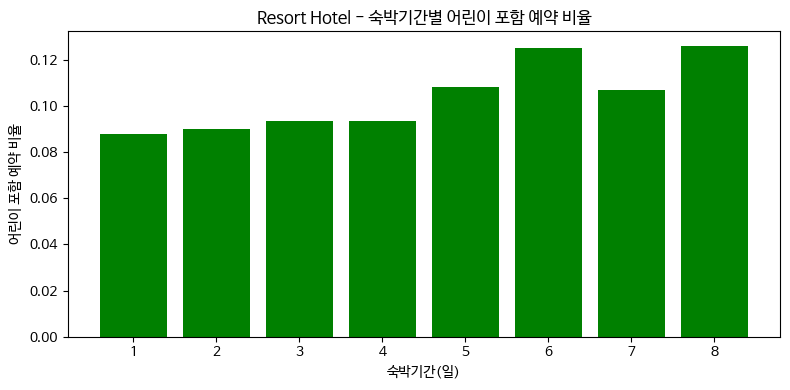

In [177]:
df = df_commit_0_7.copy()  # 데이터 복원

hotel_names = {0: 'Resort Hotel'}
for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code]
    # 전체 예약건수(숙박기간별)
    total_by_stay = df_hotel.groupby('stay_days').size().reset_index(name='전체예약건수')
    # 어린이 포함 예약건수(숙박기간별)
    child_by_stay = df_hotel[(df_hotel['children'] > 0) | (df_hotel['babies'] > 0)].groupby('stay_days').size().reset_index(name='어린이포함예약건수')
    # 병합
    merged = pd.merge(total_by_stay, child_by_stay, on='stay_days', how='left').fillna(0)
    merged['어린이포함비율'] = merged['어린이포함예약건수'] / merged['전체예약건수']

    print(f"\n[{hotel_name}] 숙박기간별 어린이 포함 예약 비율:")
    display(merged)

    plt.figure(figsize=(8, 4))
    plt.bar(merged['stay_days'], merged['어린이포함비율'], color='green')
    plt.xlabel('숙박기간(일)')
    plt.ylabel('어린이 포함 예약 비율')
    plt.title(f'{hotel_name} - 숙박기간별 어린이 포함 예약 비율')
    plt.xticks(merged['stay_days'])
    plt.tight_layout()
    plt.show()


[City Hotel] 숙박기간별 어린이 포함 예약 비율:


,stay_days,전체예약건수,어린이포함예약건수,어린이포함비율
0,1,6840,434,0.063450
1,2,4848,499,0.102929
2,3,4222,508,0.120322
3,4,3855,493,0.127886
4,5,2521,426,0.168981
5,6,1593,303,0.190207
6,7,5517,770,0.139569
7,8,684,107,0.156433


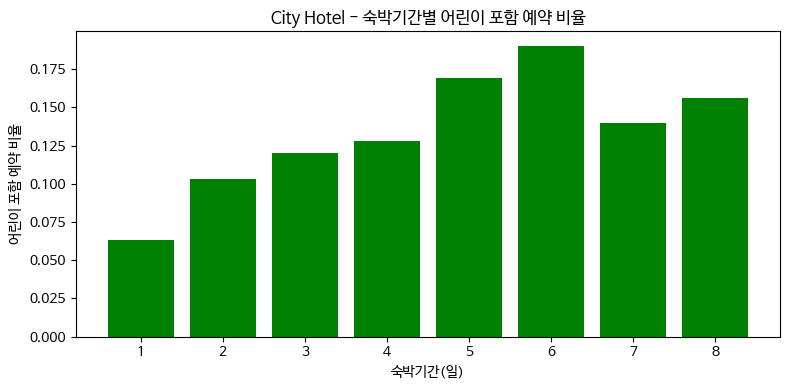

In [176]:
df = df_commit_0_7.copy()  # 데이터 복원

hotel_names = {1: 'City Hotel'}
for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code]
    # 전체 예약건수(숙박기간별)
    total_by_stay = df_hotel.groupby('stay_days').size().reset_index(name='전체예약건수')
    # 어린이 포함 예약건수(숙박기간별)
    child_by_stay = df_hotel[(df_hotel['children'] > 0) | (df_hotel['babies'] > 0)].groupby('stay_days').size().reset_index(name='어린이포함예약건수')
    # 병합
    merged = pd.merge(total_by_stay, child_by_stay, on='stay_days', how='left').fillna(0)
    merged['어린이포함비율'] = merged['어린이포함예약건수'] / merged['전체예약건수']

    print(f"\n[{hotel_name}] 숙박기간별 어린이 포함 예약 비율:")
    display(merged)

    plt.figure(figsize=(8, 4))
    plt.bar(merged['stay_days'], merged['어린이포함비율'], color='green')
    plt.xlabel('숙박기간(일)')
    plt.ylabel('어린이 포함 예약 비율')
    plt.title(f'{hotel_name} - 숙박기간별 어린이 포함 예약 비율')
    plt.xticks(merged['stay_days'])
    plt.tight_layout()
    plt.show()

In [136]:
df.head_att(1)


   호텔타입    취소여부  예약기간          도착연도             도착월                   도착주                    도착일                주말박수             평일박수 성인수   아동수 유아수 식사타입    국가       시장구분             유통채널        재방문여부             이전취소수                     이전성공수         예약룸타입         배정룸타입      예약변경수 에이전트ID             대기일수                  주차공간수                특별요청수           예약상태              상태변경일     도착일     도착기간월    숙박일     숙박인원       요금   가족분류
      hotel is_canceled lead_time arrival_date_year arrival_date_month arrival_date_week_number arrival_date_day_of_month stays_in_weekend_nights stays_in_week_nights adults children babies     meal country market_segment distribution_channel is_repeated_guest previous_cancellations previous_bookings_not_canceled reserved_room_type assigned_room_type booking_changes      agent days_in_waiting_list required_car_parking_spaces total_of_special_requests reservation_status reservation_status_date   arr_date arr_year_month stay_days total_guests room_price guest_t


[Resort Hotel] 월별 매출/예약/취소/취소 중 어린이 포함 비율 (1월~12월 기준)


,월,매출합계,예약건수,취소건수,매출비율,예약비율,취소비율,취소 중 어린이포함 비율
0,10월,231266,4069,1106,0.065073,0.078991,0.021471,0.081374
1,11월,143399,2821,701,0.040349,0.054764,0.013608,0.055635
2,12월,183545,2864,919,0.051646,0.055599,0.017841,0.143634
3,1월,138848,2550,680,0.039069,0.049503,0.013201,0.089706
4,2월,206877,3434,905,0.058211,0.066664,0.017569,0.112707
5,3월,284357,4705,1322,0.080012,0.091338,0.025664,0.082451
6,4월,329812,4974,1715,0.092802,0.096560,0.033293,0.114869
7,5월,303561,5292,1713,0.085415,0.102733,0.033254,0.072971
8,6월,285097,4866,1474,0.080220,0.094463,0.028615,0.096336
9,7월,566396,5490,1798,0.159371,0.106577,0.034904,0.122914


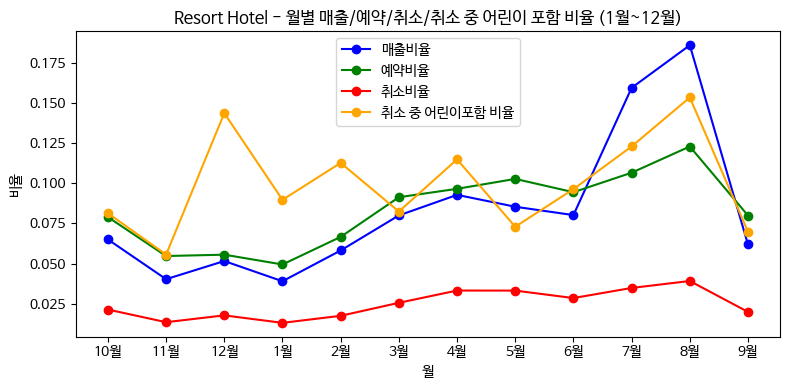

In [180]:
df = df_commit_0_7.copy()  # 데이터 복원

# 월 컬럼 한글 변환
month_map = {
    'January': '1월', 'February': '2월', 'March': '3월', 'April': '4월',
    'May': '5월', 'June': '6월', 'July': '7월', 'August': '8월',
    'September': '9월', 'October': '10월', 'November': '11월', 'December': '12월'
}
df['월'] = df['arrival_date_month'].map(month_map)

hotel_names = {0: 'Resort Hotel'}
for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code].copy()
    # 월별 집계
    monthly = df_hotel.groupby('월').agg(
        매출합계=('room_price', 'sum'),
        예약건수=('is_canceled', 'count'),
        취소건수=('is_canceled', 'sum')
    ).reset_index()
    monthly['매출비율'] = monthly['매출합계'] / monthly['매출합계'].sum()
    monthly['예약비율'] = monthly['예약건수'] / monthly['예약건수'].sum()
    monthly['취소비율'] = monthly['취소건수'] / monthly['예약건수'].sum()

    df_cancel = df_hotel[df_hotel['is_canceled'] == 1].copy()
    df_cancel['월'] = df_cancel['arrival_date_month'].map(month_map)
    df_cancel['어린이포함'] = ((df_cancel['children'] > 0) | (df_cancel['babies'] > 0)).astype(int)
    child_cancel = df_cancel.groupby('월')['어린이포함'].mean().reset_index()
    child_cancel.rename(columns={'어린이포함': '취소 중 어린이포함 비율'}, inplace=True)

    monthly = pd.merge(monthly, child_cancel, on='월', how='left').fillna(0)

    print(f"\n[{hotel_name}] 월별 매출/예약/취소/취소 중 어린이 포함 비율 (1월~12월 기준)")
    display(monthly[['월', '매출합계', '예약건수', '취소건수', '매출비율', '예약비율', '취소비율', '취소 중 어린이포함 비율']])

    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 4))
    plt.plot(monthly['월'], monthly['매출비율'], marker='o', label='매출비율', color='blue')
    plt.plot(monthly['월'], monthly['예약비율'], marker='o', label='예약비율', color='green')
    plt.plot(monthly['월'], monthly['취소비율'], marker='o', label='취소비율', color='red')
    plt.plot(monthly['월'], monthly['취소 중 어린이포함 비율'], marker='o', label='취소 중 어린이포함 비율', color='orange')
    plt.xlabel('월')
    plt.ylabel('비율')
    plt.title(f'{hotel_name} - 월별 매출/예약/취소/취소 중 어린이 포함 비율 (1월~12월)')
    plt.legend()
    plt.tight_layout()
    plt.show()


[City Hotel] 월별 매출/예약/취소/취소 중 어린이 포함 비율 (1월~12월 기준)


,월,매출합계,예약건수,취소건수,매출비율,예약비율,취소비율,취소 중 어린이포함 비율
0,10월,188113,2476,474,0.065562,0.082314,0.015758,0.143460
1,11월,108912,1886,293,0.037958,0.062699,0.009741,0.054608
2,12월,118599,1944,356,0.041334,0.064628,0.011835,0.115169
3,1월,86857,1843,254,0.030272,0.061270,0.008444,0.078740
4,2월,132341,2338,409,0.046124,0.077726,0.013597,0.119804
5,3월,157665,2424,415,0.054950,0.080585,0.013797,0.113253
6,4월,208943,2632,614,0.072821,0.087500,0.020412,0.161238
7,5월,219999,2573,628,0.076675,0.085539,0.020878,0.154459
8,6월,217493,2242,708,0.075801,0.074535,0.023537,0.204802
9,7월,587293,3667,1127,0.204685,0.121908,0.037467,0.219166


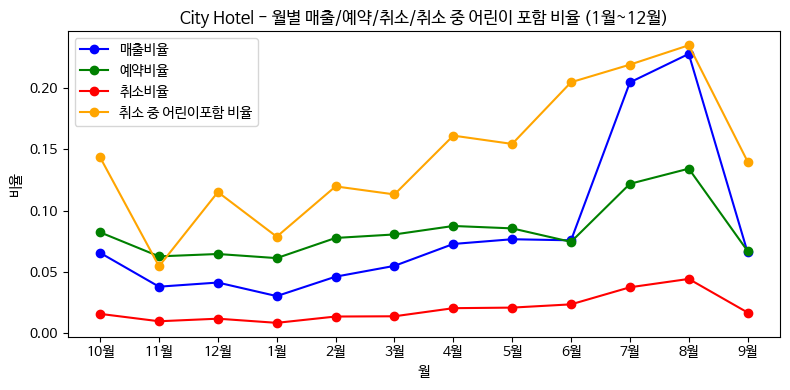

In [181]:
df = df_commit_0_7.copy()  # 데이터 복원

# 월 컬럼 한글 변환
month_map = {
    'January': '1월', 'February': '2월', 'March': '3월', 'April': '4월',
    'May': '5월', 'June': '6월', 'July': '7월', 'August': '8월',
    'September': '9월', 'October': '10월', 'November': '11월', 'December': '12월'
}
df['월'] = df['arrival_date_month'].map(month_map)

hotel_names = {1: 'City Hotel'}
for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code].copy()
    # 월별 집계
    monthly = df_hotel.groupby('월').agg(
        매출합계=('room_price', 'sum'),
        예약건수=('is_canceled', 'count'),
        취소건수=('is_canceled', 'sum')
    ).reset_index()
    monthly['매출비율'] = monthly['매출합계'] / monthly['매출합계'].sum()
    monthly['예약비율'] = monthly['예약건수'] / monthly['예약건수'].sum()
    monthly['취소비율'] = monthly['취소건수'] / monthly['예약건수'].sum()

    df_cancel = df_hotel[df_hotel['is_canceled'] == 1].copy()
    df_cancel['월'] = df_cancel['arrival_date_month'].map(month_map)
    df_cancel['어린이포함'] = ((df_cancel['children'] > 0) | (df_cancel['babies'] > 0)).astype(int)
    child_cancel = df_cancel.groupby('월')['어린이포함'].mean().reset_index()
    child_cancel.rename(columns={'어린이포함': '취소 중 어린이포함 비율'}, inplace=True)

    monthly = pd.merge(monthly, child_cancel, on='월', how='left').fillna(0)

    print(f"\n[{hotel_name}] 월별 매출/예약/취소/취소 중 어린이 포함 비율 (1월~12월 기준)")
    display(monthly[['월', '매출합계', '예약건수', '취소건수', '매출비율', '예약비율', '취소비율', '취소 중 어린이포함 비율']])

    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 4))
    plt.plot(monthly['월'], monthly['매출비율'], marker='o', label='매출비율', color='blue')
    plt.plot(monthly['월'], monthly['예약비율'], marker='o', label='예약비율', color='green')
    plt.plot(monthly['월'], monthly['취소비율'], marker='o', label='취소비율', color='red')
    plt.plot(monthly['월'], monthly['취소 중 어린이포함 비율'], marker='o', label='취소 중 어린이포함 비율', color='orange')
    plt.xlabel('월')
    plt.ylabel('비율')
    plt.title(f'{hotel_name} - 월별 매출/예약/취소/취소 중 어린이 포함 비율 (1월~12월)')
    plt.legend()
    plt.tight_layout()
    plt.show()


[Resort Hotel] 1월~12월 상관분석 (주요 변수 포함)
상관계수:


,예약취소,가족유형,숙박기간,예약기간,요금,특별요청수,대기일수
예약취소,1.000000,0.023909,0.080371,0.193539,0.096822,-0.166251,0.006232
가족유형,0.023909,1.000000,0.023518,0.021094,0.302743,0.101925,-0.022824
숙박기간,0.080371,0.023518,1.000000,0.219483,0.727206,0.058588,-0.007912
예약기간,0.193539,0.021094,0.219483,1.000000,0.226152,0.015822,0.154032
요금,0.096822,0.302743,0.727206,0.226152,1.000000,0.108515,-0.037225
특별요청수,-0.166251,0.101925,0.058588,0.015822,0.108515,1.000000,-0.059718
대기일수,0.006232,-0.022824,-0.007912,0.154032,-0.037225,-0.059718,1.000000


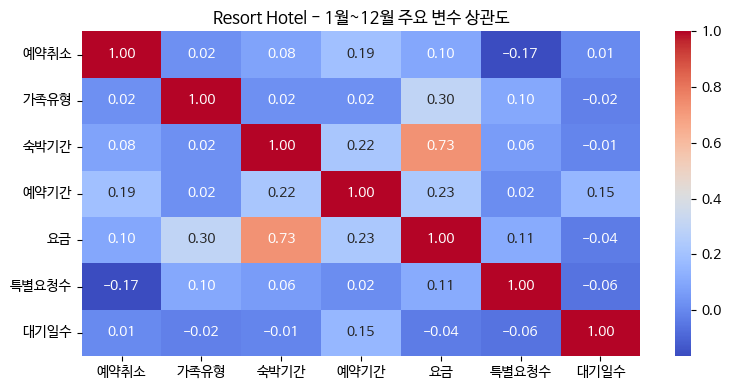


[Resort Hotel] 1월~12월 가족유형별 예약/취소/숙박기간/요금/특별요청수


,가족유형,예약건수,취소건수,취소율,평균숙박기간,평균요금,평균특별요청수
0,성인만,46648,13784,0.295490,3.003687,63.685131,0.684938
1,어린이 포함,4513,1542,0.341680,3.143585,123.388212,0.948371
2,어린이+유아 혼합,67,12,0.179104,2.671642,114.074627,1.611940
3,유아 포함,284,46,0.161972,3.123239,65.700704,1.538732


In [219]:
df = df_commit_0_7.copy()  # 데이터 복원

# 월 한글 변환
month_map = {
    'January': '1월', 'February': '2월', 'March': '3월', 'April': '4월',
    'May': '5월', 'June': '6월', 'July': '7월', 'August': '8월',
    'September': '9월', 'October': '10월', 'November': '11월', 'December': '12월'
}
df['월'] = df['arrival_date_month'].map(month_map)

# 가족유형 한글 라벨
guest_type_map = {0: '성인만', 1: '유아 포함', 2: '어린이 포함', 3: '어린이+유아 혼합'}
df['가족유형'] = df['guest_type'].map(guest_type_map)

# 분석에 포함할 주요 컬럼
cols = [
    'is_canceled',         # 예약취소
    'guest_type',          # 가족유형(코드)
    'stay_days',           # 숙박기간
    'lead_time',           # 예약기간
    'room_price',          # 요금
    'total_of_special_requests', # 특별요청수
    'days_in_waiting_list' # 대기일수
]

kor_labels = {
    'is_canceled': '예약취소',
    'guest_type': '가족유형',
    'stay_days': '숙박기간',
    'lead_time': '예약기간',
    'room_price': '요금',
    'total_of_special_requests': '특별요청수',
    'days_in_waiting_list': '대기일수'
}
hotel_names = {0: 'Resort Hotel'}
for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code].copy()
    print(f"\n[{hotel_name}] 1월~12월 상관분석 (주요 변수 포함)")

    # 상관계수 계산
    corr = df_hotel[cols].corr()
    corr.index = [kor_labels.get(c, c) for c in corr.index]
    corr.columns = [kor_labels.get(c, c) for c in corr.columns]

    print("상관계수:")
    display(corr)

    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 4))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f"{hotel_name} - 1월~12월 주요 변수 상관도")
    plt.tight_layout()
    plt.show()

    # 가족유형별 예약/취소/숙박기간/요금/특별요청수 집계
    group = df_hotel.groupby('가족유형').agg(
        예약건수=('is_canceled', 'count'),
        취소건수=('is_canceled', 'sum'),
        취소율=('is_canceled', 'mean'),
        평균숙박기간=('stay_days', 'mean'),
        평균요금=('room_price', 'mean'),
        평균특별요청수=('total_of_special_requests', 'mean')
    ).reset_index()
    print(f"\n[{hotel_name}] 1월~12월 가족유형별 예약/취소/숙박기간/요금/특별요청수")
    display(group)


[City Hotel] 1월~12월 상관분석 (주요 변수 포함)
상관계수:


,예약취소,가족유형,숙박기간,예약기간,요금,특별요청수,대기일수
예약취소,1.000000,0.095436,0.140879,0.205511,0.177389,-0.052804,-0.020486
가족유형,0.095436,1.000000,0.091520,0.046308,0.441018,0.056447,-0.019256
숙박기간,0.140879,0.091520,1.000000,0.478698,0.764014,0.080434,0.029787
예약기간,0.205511,0.046308,0.478698,1.000000,0.368354,0.062484,0.092469
요금,0.177389,0.441018,0.764014,0.368354,1.000000,0.098492,-0.005905
특별요청수,-0.052804,0.056447,0.080434,0.062484,0.098492,1.000000,-0.036891
대기일수,-0.020486,-0.019256,0.029787,0.092469,-0.005905,-0.036891,1.000000


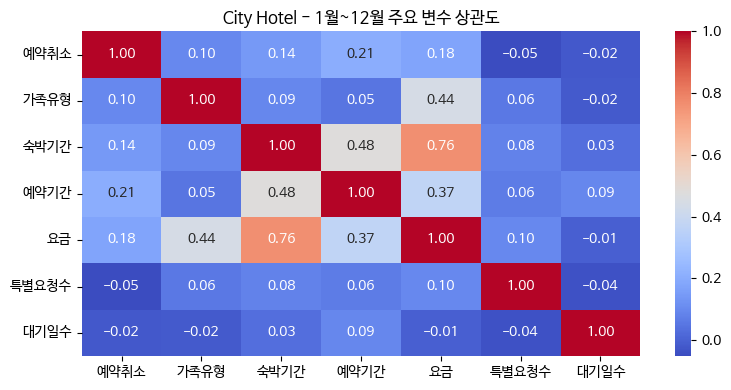


[City Hotel] 1월~12월 가족유형별 예약/취소/숙박기간/요금/특별요청수


,가족유형,예약건수,취소건수,취소율,평균숙박기간,평균요금,평균특별요청수
0,성인만,26540,5904,0.222457,3.607913,82.171967,0.658365
1,어린이 포함,3026,1121,0.370456,4.239260,206.039656,0.729015
2,어린이+유아 혼합,97,16,0.164948,4.391753,180.742268,1.412371
3,유아 포함,417,76,0.182254,4.479616,113.685851,1.582734


In [220]:
df = df_commit_0_7.copy()  # 데이터 복원

# 월 한글 변환
month_map = {
    'January': '1월', 'February': '2월', 'March': '3월', 'April': '4월',
    'May': '5월', 'June': '6월', 'July': '7월', 'August': '8월',
    'September': '9월', 'October': '10월', 'November': '11월', 'December': '12월'
}
df['월'] = df['arrival_date_month'].map(month_map)

# 가족유형 한글 라벨
guest_type_map = {0: '성인만', 1: '유아 포함', 2: '어린이 포함', 3: '어린이+유아 혼합'}
df['가족유형'] = df['guest_type'].map(guest_type_map)

# 분석에 포함할 주요 컬럼
cols = [
    'is_canceled',         # 예약취소
    'guest_type',          # 가족유형(코드)
    'stay_days',           # 숙박기간
    'lead_time',           # 예약기간
    'room_price',          # 요금
    'total_of_special_requests', # 특별요청수
    'days_in_waiting_list' # 대기일수
]

kor_labels = {
    'is_canceled': '예약취소',
    'guest_type': '가족유형',
    'stay_days': '숙박기간',
    'lead_time': '예약기간',
    'room_price': '요금',
    'total_of_special_requests': '특별요청수',
    'days_in_waiting_list': '대기일수'
}

hotel_names = {1: 'City Hotel'}
for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code].copy()
    print(f"\n[{hotel_name}] 1월~12월 상관분석 (주요 변수 포함)")

    # 상관계수 계산
    corr = df_hotel[cols].corr()
    corr.index = [kor_labels.get(c, c) for c in corr.index]
    corr.columns = [kor_labels.get(c, c) for c in corr.columns]

    print("상관계수:")
    display(corr)

    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 4))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f"{hotel_name} - 1월~12월 주요 변수 상관도")
    plt.tight_layout()
    plt.show()

    # 가족유형별 예약/취소/숙박기간/요금/특별요청수 집계
    group = df_hotel.groupby('가족유형').agg(
        예약건수=('is_canceled', 'count'),
        취소건수=('is_canceled', 'sum'),
        취소율=('is_canceled', 'mean'),
        평균숙박기간=('stay_days', 'mean'),
        평균요금=('room_price', 'mean'),
        평균특별요청수=('total_of_special_requests', 'mean')
    ).reset_index()
    print(f"\n[{hotel_name}] 1월~12월 가족유형별 예약/취소/숙박기간/요금/특별요청수")
    display(group)


[Resort Hotel] 월별 어린이 포함 예약 건수 및 비율:
   arr_year_month  전체예약건수  어린이포함예약건수   어린이포함비율
0         2015-07     360         13  0.036111
1         2015-08    1054        105  0.099620
2         2015-09    1626         69  0.042435
3         2015-10    1517         70  0.046144
4         2015-11     769         23  0.029909
5         2015-12     971         81  0.083419
6         2016-01     952         36  0.037815
7         2016-02    1551        123  0.079304
8         2016-03    2285        195  0.085339
9         2016-04    2362        224  0.094835
10        2016-05    2278        166  0.072871
11        2016-06    2212        158  0.071429
12        2016-07    2375        409  0.172211
13        2016-08    2686        494  0.183917
14        2016-09    2491        172  0.069049
15        2016-10    2552        217  0.085031
16        2016-11    2052        102  0.049708
17        2016-12    1893        248  0.131009
18        2017-01    1598        156  0.097622
19        2017-02    1

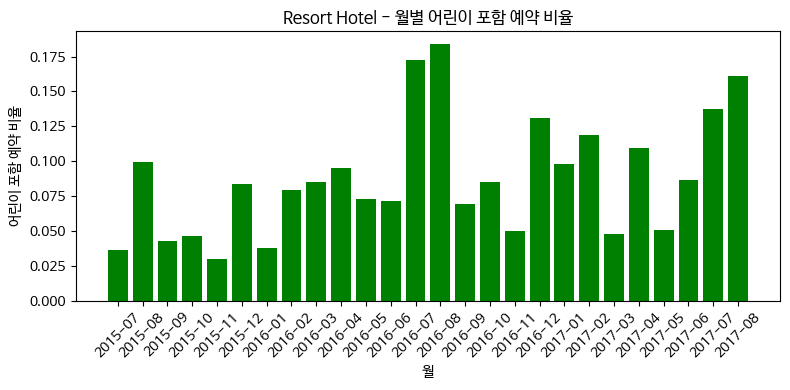

In [188]:
df = df_commit_0_7.copy()  # 데이터 복원

hotel_names = {0: 'Resort Hotel'}
for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code]
    # 어린이(아동+유아) 포함 예약만 필터링
    df_child = df_hotel[(df_hotel['children'] > 0) | (df_hotel['babies'] > 0)]
    # 월별 어린이 포함 예약 건수 및 비율
    monthly_child = df_child.groupby('arr_year_month').size().reset_index(name='어린이포함예약건수')
    monthly_total = df_hotel.groupby('arr_year_month').size().reset_index(name='전체예약건수')
    monthly = pd.merge(monthly_total, monthly_child, on='arr_year_month', how='left').fillna(0)
    monthly['어린이포함비율'] = monthly['어린이포함예약건수'] / monthly['전체예약건수']

    print(f"\n[{hotel_name}] 월별 어린이 포함 예약 건수 및 비율:")
    print(monthly)

    # 시각화
    plt.figure(figsize=(8, 4))
    plt.bar(monthly['arr_year_month'], monthly['어린이포함비율'], color='green')
    plt.xlabel('월')
    plt.ylabel('어린이 포함 예약 비율')
    plt.title(f'{hotel_name} - 월별 어린이 포함 예약 비율')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


[City Hotel] 월별 어린이 포함 예약 건수 및 비율:
   arr_year_month  전체예약건수  어린이포함예약건수   어린이포함비율
0         2015-07    1116        163  0.146057
1         2015-08    1173        203  0.173061
2         2015-09     958         64  0.066806
3         2015-10    1035         71  0.068599
4         2015-11     781         43  0.055058
5         2015-12     882         84  0.095238
6         2016-01     769         38  0.049415
7         2016-02    1073         98  0.091333
8         2016-03    1370        122  0.089051
9         2016-04    1250         80  0.064000
10        2016-05    1236        104  0.084142
11        2016-06     969        128  0.132095
12        2016-07    1124        215  0.191281
13        2016-08    1371        318  0.231947
14        2016-09    1058        114  0.107750
15        2016-10    1441        121  0.083969
16        2016-11    1105         47  0.042534
17        2016-12    1062        110  0.103578
18        2017-01    1074         66  0.061453
19        2017-02    126

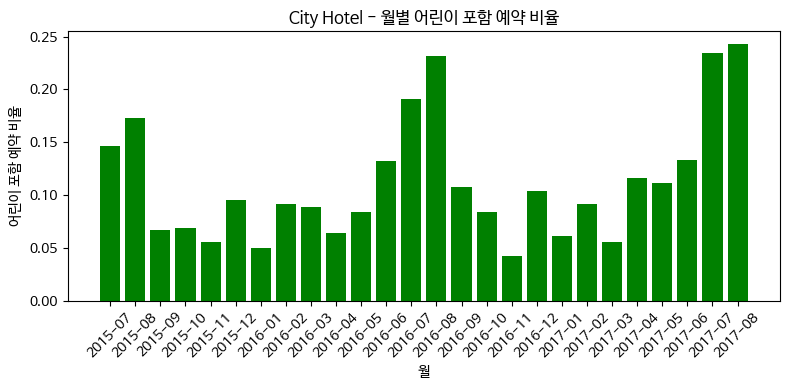

In [221]:
df = df_commit_0_7.copy()  # 데이터 복원

hotel_names = {1: 'City Hotel'}
for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code]
    # 어린이(아동+유아) 포함 예약만 필터링
    df_child = df_hotel[(df_hotel['children'] > 0) | (df_hotel['babies'] > 0)]
    # 월별 어린이 포함 예약 건수 및 비율
    monthly_child = df_child.groupby('arr_year_month').size().reset_index(name='어린이포함예약건수')
    monthly_total = df_hotel.groupby('arr_year_month').size().reset_index(name='전체예약건수')
    monthly = pd.merge(monthly_total, monthly_child, on='arr_year_month', how='left').fillna(0)
    monthly['어린이포함비율'] = monthly['어린이포함예약건수'] / monthly['전체예약건수']

    print(f"\n[{hotel_name}] 월별 어린이 포함 예약 건수 및 비율:")
    print(monthly)

    # 시각화
    plt.figure(figsize=(8, 4))
    plt.bar(monthly['arr_year_month'], monthly['어린이포함비율'], color='green')
    plt.xlabel('월')
    plt.ylabel('어린이 포함 예약 비율')
    plt.title(f'{hotel_name} - 월별 어린이 포함 예약 비율')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


[Resort Hotel] 월별 예약/취소/취소비율
    arr_year_month 예약건수 취소건수 취소비율
    arr_year_month 예약건수 취소건수 취소비율
  0        2015-07      360      211    0.586
  1        2015-08     1054      220    0.209
  2        2015-09     1626      302    0.186
  3        2015-10     1517      284    0.187
  4        2015-11      769      130    0.169
  5        2015-12      971      207    0.213
  6        2016-01      952      180    0.189
  7        2016-02     1551      331    0.213
  8        2016-03     2285      622    0.272
  9        2016-04     2362      734    0.311
 10        2016-05     2278      631    0.277
 11        2016-06     2212      589    0.266
 12        2016-07     2375      646    0.272
 13        2016-08     2686      864    0.322
 14        2016-09     2491      728    0.292
 15        2016-10     2552      822    0.322
 16        2016-11     2052      571    0.278
 17        2016-12     1893      712    0.376
 18        2017-01     1598      500    0.313
 19        2017-02     1883 

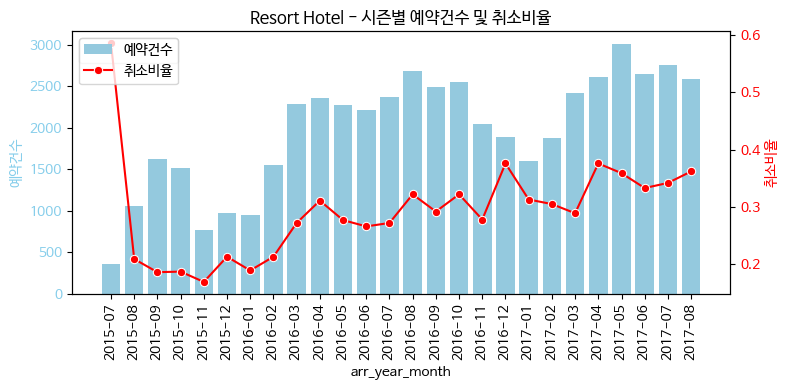

In [192]:
df = df_commit_0_7.copy()  # 데이터 복원

hotel_names = {0: 'Resort Hotel'}
for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code].copy()
    monthly = df_hotel.groupby('arr_year_month').agg(
        예약건수=('is_canceled', 'count'),
        취소건수=('is_canceled', 'sum')
    ).reset_index()
    monthly['취소비율'] = round(monthly['취소건수'] / monthly['예약건수'], 3)

    print(f"\n[{hotel_name}] 월별 예약/취소/취소비율")
    monthly[['arr_year_month', '예약건수', '취소건수', '취소비율']].head_att(100)

    plt.figure(figsize=(8, 4))
    ax1 = plt.gca()
    bar = sns.barplot(x='arr_year_month', y='예약건수', data=monthly, color='skyblue', label='예약건수', ax=ax1)
    ax1.set_ylabel('예약건수', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')

    ax2 = ax1.twinx()
    line = sns.lineplot(x='arr_year_month', y='취소비율', data=monthly, color='red', marker='o', label='취소비율', ax=ax2)
    ax2.set_ylabel('취소비율', color='red')  # 오른쪽 y축 레이블 명확히
    ax2.tick_params(axis='y', labelcolor='red')

    plt.xlabel('월')
    plt.title(f'{hotel_name} - 시즌별 예약건수 및 취소비율')
    plt.setp(ax1.get_xticklabels(), rotation=90, ha='center')

    # 범례는 오른쪽 y축(ax2)에 따로 추가
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    plt.tight_layout()
    plt.show()


[City Hotel] 월별 예약/취소/취소비율
    arr_year_month 예약건수 취소건수 취소비율
    arr_year_month 예약건수 취소건수 취소비율
  0        2015-07     1116      256    0.229
  1        2015-08     1173      302    0.257
  2        2015-09      958      219    0.229
  3        2015-10     1035      131    0.127
  4        2015-11      781       97    0.124
  5        2015-12      882      130    0.147
  6        2016-01      769       80    0.104
  7        2016-02     1073      135    0.126
  8        2016-03     1370      220    0.161
  9        2016-04     1250      244    0.195
 10        2016-05     1236      265    0.214
 11        2016-06      969      254    0.262
 12        2016-07     1124      352    0.313
 13        2016-08     1371      463    0.338
 14        2016-09     1058      288    0.272
 15        2016-10     1441      343    0.238
 16        2016-11     1105      196    0.177
 17        2016-12     1062      226    0.213
 18        2017-01     1074      174    0.162
 19        2017-02     1265   

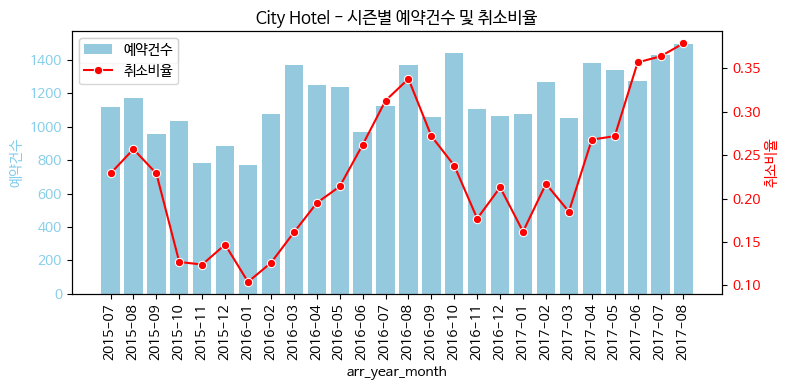

In [193]:
df = df_commit_0_7.copy()  # 데이터 복원

hotel_names = {1: 'City Hotel'}
for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code].copy()
    monthly = df_hotel.groupby('arr_year_month').agg(
        예약건수=('is_canceled', 'count'),
        취소건수=('is_canceled', 'sum')
    ).reset_index()
    monthly['취소비율'] = round(monthly['취소건수'] / monthly['예약건수'], 3)

    print(f"\n[{hotel_name}] 월별 예약/취소/취소비율")
    monthly[['arr_year_month', '예약건수', '취소건수', '취소비율']].head_att(100)

    plt.figure(figsize=(8, 4))
    ax1 = plt.gca()
    bar = sns.barplot(x='arr_year_month', y='예약건수', data=monthly, color='skyblue', label='예약건수', ax=ax1)
    ax1.set_ylabel('예약건수', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')

    ax2 = ax1.twinx()
    line = sns.lineplot(x='arr_year_month', y='취소비율', data=monthly, color='red', marker='o', label='취소비율', ax=ax2)
    ax2.set_ylabel('취소비율', color='red')  # 오른쪽 y축 레이블 명확히
    ax2.tick_params(axis='y', labelcolor='red')

    plt.xlabel('월')
    plt.title(f'{hotel_name} - 시즌별 예약건수 및 취소비율')
    plt.setp(ax1.get_xticklabels(), rotation=90, ha='center')

    # 범례는 오른쪽 y축(ax2)에 따로 추가
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    plt.tight_layout()
    plt.show()


[Resort Hotel] 월별 취소건 중 어린이 포함 비율
   arr_year_month  취소 중 어린이포함 비율
0         2015-07       0.018957
1         2015-08       0.059091
2         2015-09       0.033113
3         2015-10       0.028169
4         2015-11       0.038462
5         2015-12       0.101449
6         2016-01       0.055556
7         2016-02       0.060423
8         2016-03       0.107717
9         2016-04       0.115804
10        2016-05       0.103011
11        2016-06       0.088285
12        2016-07       0.167183
13        2016-08       0.177083
14        2016-09       0.085165
15        2016-10       0.099757
16        2016-11       0.059545
17        2016-12       0.155899
18        2017-01       0.102000
19        2017-02       0.142857
20        2017-03       0.060000
21        2017-04       0.114169
22        2017-05       0.055453
23        2017-06       0.101695
24        2017-07       0.115834
25        2017-08       0.153682


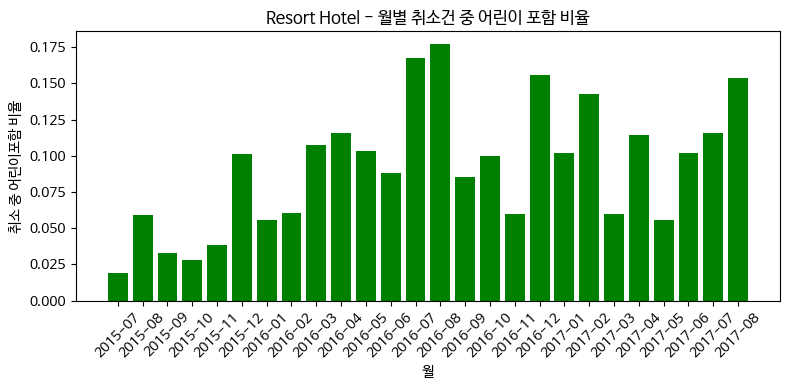

In [197]:
df = df_commit_0_7.copy()  # 데이터 복원

hotel_names = {0: 'Resort Hotel'}
for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code].copy()
    df_cancel = df_hotel[df_hotel['is_canceled'] == 1].copy()
    df_cancel['어린이포함'] = ((df_cancel['children'] > 0) | (df_cancel['babies'] > 0)).astype(int)
    monthly = df_cancel.groupby('arr_year_month')['어린이포함'].mean().reset_index()
    monthly.rename(columns={'어린이포함': '취소 중 어린이포함 비율'}, inplace=True)

    print(f"\n[{hotel_name}] 월별 취소건 중 어린이 포함 비율")
    print(monthly)

    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 4))
    plt.bar(monthly['arr_year_month'], monthly['취소 중 어린이포함 비율'], color='green')
    plt.xlabel('월')
    plt.ylabel('취소 중 어린이포함 비율')
    plt.title(f'{hotel_name} - 월별 취소건 중 어린이 포함 비율')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


[City Hotel] 월별 취소건 중 어린이 포함 비율
   arr_year_month  취소 중 어린이포함 비율
0         2015-07       0.128906
1         2015-08       0.172185
2         2015-09       0.077626
3         2015-10       0.129771
4         2015-11       0.082474
5         2015-12       0.107692
6         2016-01       0.050000
7         2016-02       0.177778
8         2016-03       0.127273
9         2016-04       0.094262
10        2016-05       0.105660
11        2016-06       0.181102
12        2016-07       0.198864
13        2016-08       0.252700
14        2016-09       0.187500
15        2016-10       0.148688
16        2016-11       0.040816
17        2016-12       0.119469
18        2017-01       0.091954
19        2017-02       0.091241
20        2017-03       0.097436
21        2017-04       0.205405
22        2017-05       0.190083
23        2017-06       0.218062
24        2017-07       0.277457
25        2017-08       0.253968


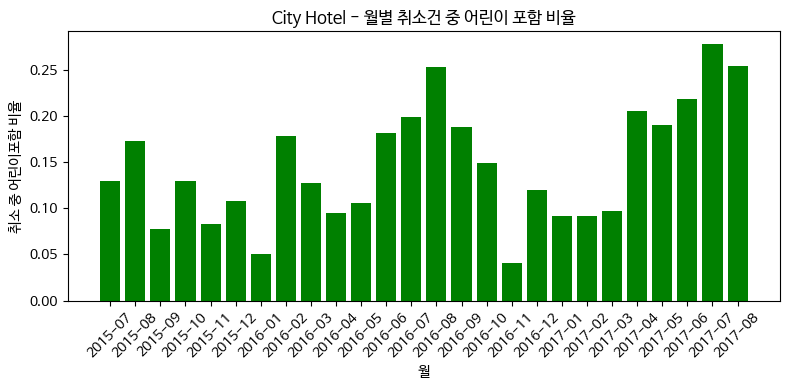

In [198]:
df = df_commit_0_7.copy()  # 데이터 복원

hotel_names = {1: 'City Hotel'}
for hotel_code, hotel_name in hotel_names.items():
    df_hotel = df[df['hotel'] == hotel_code].copy()
    df_cancel = df_hotel[df_hotel['is_canceled'] == 1].copy()
    df_cancel['어린이포함'] = ((df_cancel['children'] > 0) | (df_cancel['babies'] > 0)).astype(int)
    monthly = df_cancel.groupby('arr_year_month')['어린이포함'].mean().reset_index()
    monthly.rename(columns={'어린이포함': '취소 중 어린이포함 비율'}, inplace=True)

    print(f"\n[{hotel_name}] 월별 취소건 중 어린이 포함 비율")
    print(monthly)

    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 4))
    plt.bar(monthly['arr_year_month'], monthly['취소 중 어린이포함 비율'], color='green')
    plt.xlabel('월')
    plt.ylabel('취소 중 어린이포함 비율')
    plt.title(f'{hotel_name} - 월별 취소건 중 어린이 포함 비율')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

취소까지 걸린 일수 통계:
count    22501.000000
mean       -61.401093
std         70.549496
min       -526.000000
25%        -90.000000
50%        -34.000000
75%        -11.000000
max          0.000000
Name: 취소까지_일수, dtype: float64
상위 10개 샘플:
     arr_date reservation_status_date  취소까지_일수
8  2015-07-01              2015-05-06      -56
9  2015-07-01              2015-04-22      -70
10 2015-07-01              2015-06-23       -8
27 2015-07-01              2015-05-11      -51
34 2015-07-02              2015-05-19      -44
35 2015-07-02              2015-06-19      -13
38 2015-07-02              2015-05-23      -40
40 2015-07-02              2015-05-18      -45
45 2015-07-02              2015-06-02      -30
64 2015-07-02              2015-06-29       -3


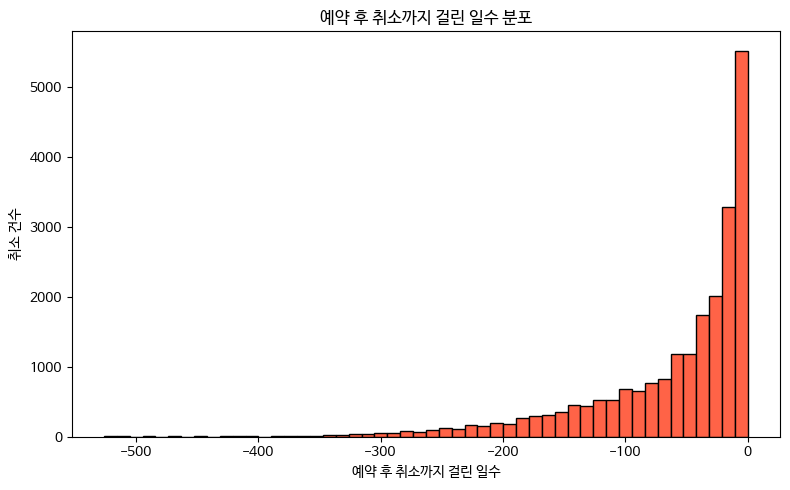

In [199]:
df = df_commit_0_7.copy()  # 데이터 복원

df['arr_date'] = pd.to_datetime(df['arr_date'])
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

df_cancel = df[df['is_canceled'] == 1].copy()
df_cancel['취소까지_일수'] = (df_cancel['reservation_status_date'] - df_cancel['arr_date']).dt.days

print("취소까지 걸린 일수 통계:")
print(df_cancel['취소까지_일수'].describe())
print("상위 10개 샘플:")
print(df_cancel[['arr_date', 'reservation_status_date', '취소까지_일수']].head(10))

plt.figure(figsize=(8, 5))
plt.hist(df_cancel['취소까지_일수'], bins=50, color='tomato', edgecolor='black')
plt.xlabel('예약 후 취소까지 걸린 일수')
plt.ylabel('취소 건수')
plt.title('예약 후 취소까지 걸린 일수 분포')
plt.tight_layout()
plt.show()

- 뭔가 데이터가 이상합니다. (과제 제출 기간내에 원인 분석이 불가능 할 것같습니다.)
- 참고로 올려 놓습니다.

In [200]:
df = df_commit_0_7.copy()  # 데이터 복원

# 날짜 타입 변환
df['arr_date'] = pd.to_datetime(df['arr_date'])
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# 예약일 < 상태변경일 (정상적인 경우)
normal_case = (df['arr_date'] < df['reservation_status_date']).sum()
# 예약일 > 상태변경일 (이상한 경우)
abnormal_case = (df['arr_date'] > df['reservation_status_date']).sum()
# 예약일 == 상태변경일
equal_case = (df['arr_date'] == df['reservation_status_date']).sum()

total = len(df)
print(f"예약일 < 상태변경일: {normal_case}건 ({normal_case/total:.2%})")
print(f"예약일 > 상태변경일: {abnormal_case}건 ({abnormal_case/total:.2%})")
print(f"예약일 = 상태변경일: {equal_case}건 ({equal_case/total:.2%})")

예약일 < 상태변경일: 59077건 (72.41%)
예약일 > 상태변경일: 20880건 (25.59%)
예약일 = 상태변경일: 1635건 (2.00%)


In [201]:
df = df_commit_0_7.copy()  # 데이터 복원

df['arr_date'] = pd.to_datetime(df['arr_date'])
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

mask_lt = df['arr_date'] < df['reservation_status_date']
mask_gt = df['arr_date'] > df['reservation_status_date']
mask_eq = df['arr_date'] == df['reservation_status_date']

def get_cancel_rate(mask):
    total = mask.sum()
    canceled = df.loc[mask, 'is_canceled'].sum()
    rate = canceled / total if total > 0 else 0
    return total, canceled, rate

lt_total, lt_canceled, lt_rate = get_cancel_rate(mask_lt)
gt_total, gt_canceled, gt_rate = get_cancel_rate(mask_gt)
eq_total, eq_canceled, eq_rate = get_cancel_rate(mask_eq)

print(f"예약일 < 상태변경일: {lt_total}건, 취소 {lt_canceled}건, 취소율 {lt_rate:.2%}")
print(f"예약일 > 상태변경일: {gt_total}건, 취소 {gt_canceled}건, 취소율 {gt_rate:.2%}")
print(f"예약일 = 상태변경일: {eq_total}건, 취소 {eq_canceled}건, 취소율 {eq_rate:.2%}")

예약일 < 상태변경일: 59077건, 취소 0건, 취소율 0.00%
예약일 > 상태변경일: 20880건, 취소 20880건, 취소율 100.00%
예약일 = 상태변경일: 1635건, 취소 1621건, 취소율 99.14%
